In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno

from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

# 연도별 폐기물 배출 분류 TOP7

In [2]:
# 폐기물 처리현황 데이터 불러오기
df_waste_total = pd.read_csv('./datas/waste_total0210.csv', header=[0,1,2,3], index_col=[0,1,2])
df_waste_total

시도별(1)         1996                                                       \
시도별(1)           총계 종량제방식에의한혼합배출                                           
시도별(1)           소계          가연성                                           
시도별(1)           소계      음식물 채소류     종이류     나무류   고무피혁류   플라스틱류      기타   
합계 발생량 소계   49925.2      14531.8  6379.7  1856.7  1121.9  2166.4  4249.2   
   처리량 기타       0.0          0.0     0.0     0.0     0.0     0.0     0.0   
       매 립  34115.6      13486.4  5276.5  1420.7   997.6  1907.6  3816.5   
       소 각   2725.0        569.5   994.7   386.0   111.3   229.2   377.6   
       재활용  13084.6        475.9   108.5    50.0    13.0    29.6    55.1   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)         불연성                  ...          윤활유   형광등     고철류     의류   
시도별(1)         연탄재     금속류     토사류  ...           소계    소계      소계     소계   
합계 발생량 소계   1852.9  1547.4  1410.1  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매 립  1821.6  1408.2  1372.0  ...          0.0   0.0     0.0    0.0   
       소 각     0.0    12.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    31.3   127.2    38.1  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[5 rows x 536 columns]

In [3]:
df_waste_total.index = ['발생량', '기타 처리량', '매립 처리량', '소각 처리량', '재활용 처리량']

In [4]:
df_waste_total_t = df_waste_total.T

In [5]:
year = []
for i in range(0, len(df_waste_total_t.index)):
    year.append(df_waste_total_t.index.values[i][0])

In [6]:
# 연도 추가
df_waste_total_t['연도'] = year

In [7]:
# 보기 편하게 수정

gubun = []
for i in range(0, len(df_waste_total_t.index)):
    if df_waste_total_t.index.values[i][1] == '총계':
        gubun.append('총계')
    elif df_waste_total_t.index.values[i][1] == '종량제방식에의한혼합배출':
        gubun.append(df_waste_total_t.index.values[i][3]+'('+df_waste_total_t.index.values[i][2]+')')
    elif df_waste_total_t.index.values[i][1] == '재활용가능자원 분리배출':
        gubun.append(df_waste_total_t.index.values[i][2])
    elif df_waste_total_t.index.values[i][1] == '음식물류폐기물분리배출':
        gubun.append('음식물류')

In [8]:
df_waste_total_t.index = gubun

In [9]:
# 컬럼 순서 변경
cols = df_waste_total_t.columns[[5,0,2,3,4,1]]
df_waste_total_t = df_waste_total_t[cols]

In [10]:
df_waste_total_t.head(20)

연도      발생량   매립 처리량  소각 처리량  재활용 처리량  기타 처리량
총계            1996  49925.2  34115.6  2725.0  13084.6     0.0
음식물 채소류(가연성)  1996  14531.8  13486.4   569.5    475.9     0.0
종이류(가연성)      1996   6379.7   5276.5   994.7    108.5     0.0
나무류(가연성)      1996   1856.7   1420.7   386.0     50.0     0.0
고무피혁류(가연성)    1996   1121.9    997.6   111.3     13.0     0.0
플라스틱류(가연성)    1996   2166.4   1907.6   229.2     29.6     0.0
기타(가연성)       1996   4249.2   3816.5   377.6     55.1     0.0
연탄재(불연성)      1996   1852.9   1821.6     0.0     31.3     0.0
금속류(불연성)      1996   1547.4   1408.2    12.0    127.2     0.0
토사류(불연성)      1996   1410.1   1372.0     0.0     38.1     0.0
기타(불연성)       1996   2646.3   2487.7     1.0    157.6     0.0
종이류           1996   6947.4     24.1    22.9   6900.4     0.0
유리병류          1996   1198.8     19.5     0.0   1179.3     0.0
캔류            1996    538.2      3.0     0.0    535.2     0.0
플라스틱류         1996    749.6     12.5    13.1    724.0     0.0
고철류           1996   1977.2     22.0     0.0   1955.2     0.0
기타            1996    751.6     39.7     7.7    704.2     0.0
총계            1997  47894.8  30578.5  3409.0  13907.3     0.0
음식물 채소류(가연성)  1997  13062.7  10973.5   814.6   1274.6     0.0
종이류(가연성)      1997   6057.0   4946.9  1036.4     73.7     0.0

In [11]:
df_waste_total_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 총계 to 음식물류
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       536 non-null    object 
 1   발생량      536 non-null    float64
 2   매립 처리량   536 non-null    float64
 3   소각 처리량   536 non-null    float64
 4   재활용 처리량  536 non-null    float64
 5   기타 처리량   536 non-null    float64
dtypes: float64(5), object(1)
memory usage: 29.3+ KB


In [12]:
# 연도 형변환
df_waste_total_t['연도'] = df_waste_total_t['연도'].apply(pd.to_numeric, errors='coerce')

##  1. ```재활용 처리``` 폐기물 연도별 종류별 순위

In [13]:
recycle = pd.pivot_table(df_waste_total_t, index=df_waste_total_t.index, values=['재활용 처리량'], columns=['연도'])
recycle.columns = recycle.columns.droplevel([0])
recycle.tail(10)

연도             1996     1997     1998     1999     2000     2001     2002  \
종이류(가연성)      108.5     73.7    149.7    133.1    120.1    105.1     94.7   
총계          13084.6  13907.3  15566.0  17393.8  19166.4  20922.1  21948.3   
캔류            535.2    607.2    690.3    633.9    615.2    618.4    678.6   
타이어             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
토사류(불연성)       38.1     17.2     10.3     26.9     25.0     22.7     14.9   
폐식용유            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
플라스틱류         724.0    726.4    868.2    964.9   1058.0   1194.3   1267.5   
플라스틱류(가연성)     29.6     31.2     48.0     31.2     36.1     41.8     53.2   
합성수지류           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
형광등             NaN      NaN      NaN      NaN      NaN      NaN      NaN   

연도             2003     2004     2005  ...     2009     2010     2011  \
종이류(가연성)       76.8     56.9     91.3  ...     97.7     80.8     55.6   
총계          22938.4  24587.9  27243.4  ...  31126.6  29752.9  28938.9   
캔류            663.1    750.5    754.7  ...    727.5    792.4    734.7   
타이어             NaN      NaN      NaN  ...    162.1     48.6     40.9   
토사류(불연성)       26.3    102.2     29.8  ...    252.6    257.9    138.8   
폐식용유            NaN      NaN      NaN  ...      NaN     57.4     60.6   
플라스틱류        1298.3   1393.4   1561.2  ...   1452.0   1350.1   1305.3   
플라스틱류(가연성)     58.5     38.2     39.1  ...    228.8    121.8     87.8   
합성수지류           NaN      NaN      NaN  ...    883.9    883.9   1033.1   
형광등             NaN      NaN      NaN  ...     35.5    142.0     84.6   

연도             2012     2013     2014     2015     2016     2017     2018  
종이류(가연성)       66.1    121.9    299.8    320.0    304.9    465.3    492.9  
총계          28951.0  28783.9  29454.2  30352.2  32252.9  32931.4  34747.1  
캔류            730.1    682.7    713.8    748.9    765.1    670.8      NaN  
타이어            31.4     24.5     33.4     24.8     29.3     46.5     79.0  
토사류(불연성)      154.1    238.5    238.0    182.1    279.1    216.1    406.2  
폐식용유           27.3     30.2     48.2     33.8     79.5     62.2     58.7  
플라스틱류        1377.5   1238.9   1236.8   1453.9   1133.2   1251.4   1490.7  
플라스틱류(가연성)    183.4    301.9    413.2    528.7    937.0   1130.9   1054.3  
합성수지류        1266.6   1335.2   1430.6   1199.9   1709.5   2168.5   2315.0  
형광등            54.0     60.4    152.5     54.8    183.2    149.1     91.4  

[10 rows x 23 columns]

In [14]:
recycle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 가구류 to 형광등
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1996    17 non-null     float64
 1   1997    17 non-null     float64
 2   1998    17 non-null     float64
 3   1999    17 non-null     float64
 4   2000    17 non-null     float64
 5   2001    17 non-null     float64
 6   2002    17 non-null     float64
 7   2003    17 non-null     float64
 8   2004    17 non-null     float64
 9   2005    17 non-null     float64
 10  2006    18 non-null     float64
 11  2007    26 non-null     float64
 12  2008    26 non-null     float64
 13  2009    28 non-null     float64
 14  2010    29 non-null     float64
 15  2011    29 non-null     float64
 16  2012    29 non-null     float64
 17  2013    29 non-null     float64
 18  2014    29 non-null     float64
 19  2015    29 non-null     float64
 20  2016    31 non-null     float64
 21  2017    31 non-null     float64
 22  2018  

In [15]:
# 총계, 소계(소계) 인덱스 삭제
recycle.drop(['총계', '소계(소계)'], inplace=True)

In [16]:
# 인덱스명 수정
recycle.rename(index={'소계(기타(배출불명 등))':'기타(배출불명 등)'}, inplace=True)

In [17]:
len(recycle.index)

32

In [18]:
recycle

연도              1996    1997    1998    1999    2000    2001    2002    2003  \
가구류              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
고무피혁류(가연성)      13.0     7.0    14.4    10.6     5.1     7.8    12.6    16.1   
고철류           1955.2  2162.5  2619.4  2504.3  2616.3  2814.0  2738.0  2785.4   
금속류(불연성)       127.2    74.5    45.3    52.0    66.5    37.9    30.5    32.6   
금속캔              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
기타             704.2   543.2   543.7   747.9   841.8   886.1   942.4   943.0   
기타(가연성)         55.1    25.4    30.9    43.2    74.1    50.3    33.2    56.3   
기타(불연성)        157.6    28.8    34.1    73.6    41.0    79.1    61.5   107.0   
나무류(가연성)        50.0    68.7    63.7    54.6    79.4    54.0    58.6    62.5   
발포수지류            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
기타(배출불명 등)       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
연탄재(불연성)        31.3     6.7    23.7    39.9    42.0    51.0    47.4    44.1   
영농폐기물            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
유리류(불연성)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
유리병류          1179.3  1463.8  1609.2  1776.4  2000.6  2175.7  2279.3  2301.9   
윤활유              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
음식물 채소류(가연성)   475.9  1274.6  2566.0  3928.5  5161.0  6378.3  7130.0  7718.4   
음식물류             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
의류               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
재활용잔재물           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
전자제품             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
전지류              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
종이류           6900.4  6796.4  6249.1  6372.9  6384.2  6405.6  6505.9  6748.1   
종이류(가연성)       108.5    73.7   149.7   133.1   120.1   105.1    94.7    76.8   
캔류             535.2   607.2   690.3   633.9   615.2   618.4   678.6   663.1   
타이어              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
토사류(불연성)        38.1    17.2    10.3    26.9    25.0    22.7    14.9    26.3   
폐식용유             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
플라스틱류          724.0   726.4   868.2   964.9  1058.0  1194.3  1267.5  1298.3   
플라스틱류(가연성)      29.6    31.2    48.0    31.2    36.1    41.8    53.2    58.5   
합성수지류            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
형광등              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

연도              2004     2005  ...     2009     2010     2011     2012  \
가구류              NaN      NaN  ...    436.9    387.8    408.9    342.4   
고무피혁류(가연성)      28.3     11.7  ...    145.8     14.7     26.8      7.1   
고철류           2655.9   2634.0  ...   2270.0   2000.9   1971.6   2243.3   
금속류(불연성)        29.7     22.5  ...     48.9     26.8     24.5     31.6   
금속캔              NaN      NaN  ...      NaN      NaN      NaN      NaN   
기타            1167.0   1188.1  ...   1154.8   1428.4   1488.8   1296.5   
기타(가연성)         37.2     47.4  ...    288.9    291.6    265.4    324.2   
기타(불연성)        257.4    193.1  ...    305.8    253.6    356.8    292.4   
나무류(가연성)        66.0     66.1  ...    813.3    835.4    798.0    510.4   
발포수지류            NaN      NaN  ...      NaN      NaN      NaN      NaN   
기타(배출불명 등)       NaN      NaN  ...      NaN      NaN      NaN      NaN   
연탄재(불연성)        31.9     27.6  ...      NaN      NaN      NaN      NaN   
영농폐기물            NaN      NaN  ...    403.4    436.1    486.8    502.1   
유리류(불연성)         NaN      NaN  ...     51.5     25.0     24.0     25.2   
유리병류          2268.5   2323.4  ...   2263.9   2034.9   1907.8   1866.2   
윤활유              NaN      NaN  ...    212.6     30.6     30.3     25.8   
음식물 채소류(가연성)  9316.0  12104.3  ...     43.9     22.8     19.5     13.2   
음식물류             NaN      N

In [19]:
len(recycle.columns)

23

### 1-1. bar (연도별 구분)

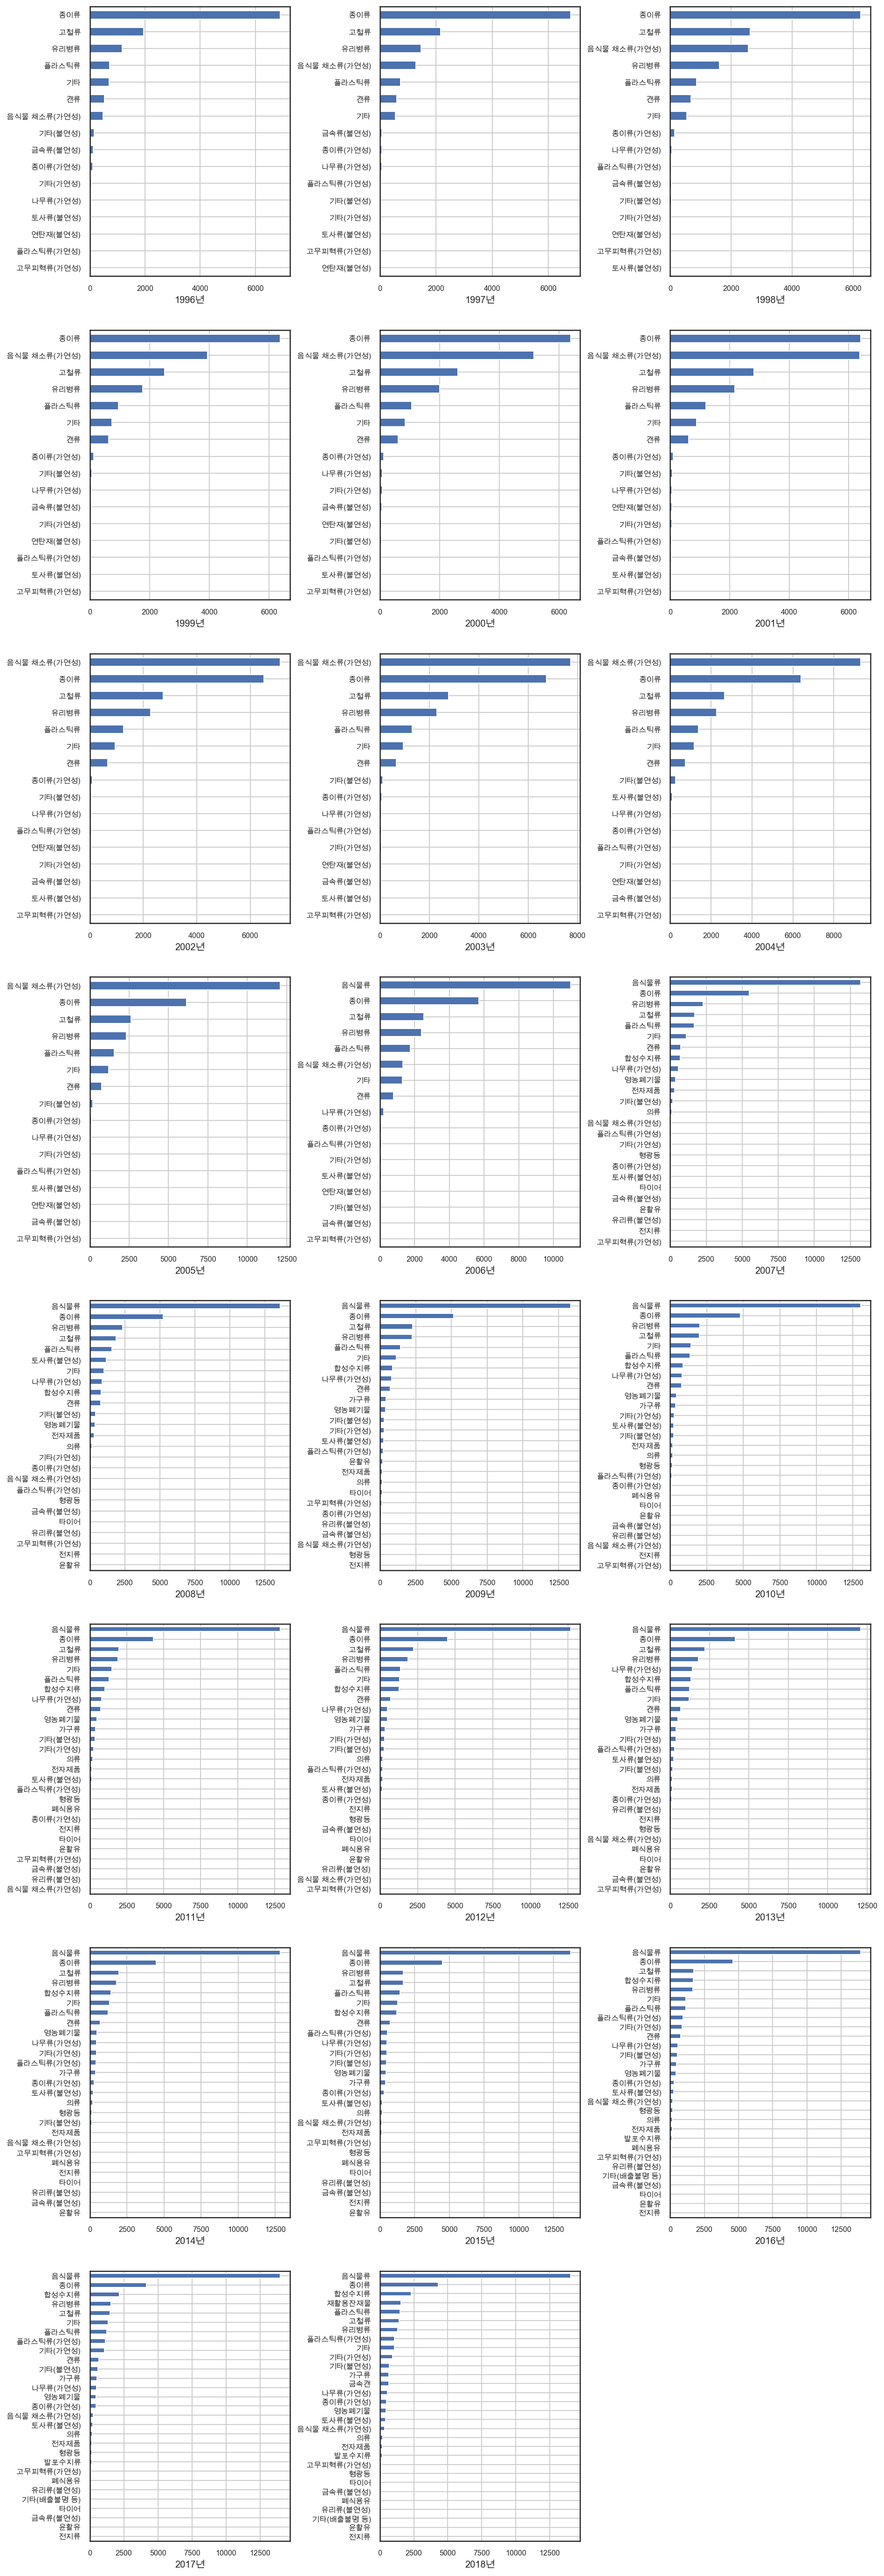

In [20]:
num = 1

for i in range(1996, 2019):
    plt.subplot(8, 3, num)
    recycle[i].dropna().sort_values().plot(
        kind='barh', grid=True, figsize=(15, 50), fontsize=8)
    plt.xlabel(str(i)+'년', fontsize=10)
    num += 1

plt.subplots_adjust(wspace=0.45)
plt.savefig('./image/recycle_year_bar.png', dpi=150, bbox_inches='tight')
plt.show()

- 1996년 ~ 2001년엔 종이류가 배출량 1위였는데, 음식물류가 빠르게 증가하더니 2002년부터 현재까지 배출량 1위를 유지중
- 다른 분류와의 배출량 차이도 점점 벌어짐

### 1-2. line (연도별 TOP7)

In [21]:
recycle_t = recycle.T
recycle_t

가구류  고무피혁류(가연성)     고철류  금속류(불연성)    금속캔      기타  기타(가연성)  기타(불연성)  \
연도                                                                           
1996    NaN        13.0  1955.2     127.2    NaN   704.2     55.1    157.6   
1997    NaN         7.0  2162.5      74.5    NaN   543.2     25.4     28.8   
1998    NaN        14.4  2619.4      45.3    NaN   543.7     30.9     34.1   
1999    NaN        10.6  2504.3      52.0    NaN   747.9     43.2     73.6   
2000    NaN         5.1  2616.3      66.5    NaN   841.8     74.1     41.0   
2001    NaN         7.8  2814.0      37.9    NaN   886.1     50.3     79.1   
2002    NaN        12.6  2738.0      30.5    NaN   942.4     33.2     61.5   
2003    NaN        16.1  2785.4      32.6    NaN   943.0     56.3    107.0   
2004    NaN        28.3  2655.9      29.7    NaN  1167.0     37.2    257.4   
2005    NaN        11.7  2634.0      22.5    NaN  1188.1     47.4    193.1   
2006    NaN        25.4  2540.6      33.4    NaN  1305.2     79.9     48.8   
2007    NaN         4.7  1715.5      26.0    NaN  1107.9     85.2    170.0   
2008    NaN        18.0  1882.5      22.4    NaN  1024.4    101.7    401.9   
2009  436.9       145.8  2270.0      48.9    NaN  1154.8    288.9    305.8   
2010  387.8        14.7  2000.9      26.8    NaN  1428.4    291.6    253.6   
2011  408.9        26.8  1971.6      24.5    NaN  1488.8    265.4    356.8   
2012  342.4         7.1  2243.3      31.6    NaN  1296.5    324.2    292.4   
2013  365.7         7.5  2207.3      17.1    NaN  1202.3    365.2    173.7   
2014  381.6        60.5  1967.1      20.6    NaN  1321.8    443.2    151.7   
2015  416.9        74.1  1691.4      22.1    NaN  1273.8    497.6    474.4   
2016  462.9        72.9  1721.6      34.8    NaN  1146.2    878.6    536.0   
2017  533.6        72.2  1489.9      34.5    NaN  1358.1   1093.7    597.7   
2018  670.1       103.4  1420.2      62.6  644.6  1052.1    938.2    699.0   

      나무류(가연성)  발포수지류  ...     종이류  종이류(가연성)     캔류    타이어  토사류(불연성)  폐식용유  \
연도                     ...                                                   
1996      50.0    NaN  ...  6900.4     108.5  535.2    NaN      38.1   NaN   
1997      68.7    NaN  ...  6796.4      73.7  607.2    NaN      17.2   NaN   
1998      63.7    NaN  ...  6249.1     149.7  690.3    NaN      10.3   NaN   
1999      54.6    NaN  ...  6372.9     133.1  633.9    NaN      26.9   NaN   
2000      79.4    NaN  ...  6384.2     120.1  615.2    NaN      25.0   NaN   
2001      54.0    NaN  ...  6405.6     105.1  618.4    NaN      22.7   NaN   
2002      58.6    NaN  ...  6505.9      94.7  678.6    NaN      14.9   NaN   
2003      62.5    NaN  ...  6748.1      76.8  663.1    NaN      26.3   NaN   
2004      66.0    NaN  ...  6388.8      56.9  750.5    NaN     102.2   NaN   
2005      66.1    NaN  ...  6149.1      91.3  754.7    NaN      29.8   NaN   
2006     214.3    NaN  ...  5710.2      94.1  792.4    NaN      72.4   NaN   
2007     582.3    NaN  ...  5475.7      67.8  739.8   32.1      55.3   NaN   
2008     871.7    NaN  ...  5250.4     101.2  796.3   21.0    1165.5   NaN   
2009     813.3    NaN  ...  5163.9      97.7  727.5  162.1     252.6   NaN   
2010     835.4    NaN  ...  4809.7      80.8  792.4   48.6     257.9  57.4   
2011     798.0    NaN  ...  4300.7      55.6  734.7   40.9     138.8  60.6   
2012     510.4    NaN  ...  4486.3      66.1  730.1   31.4     154.1  27.3   
2013    1412.6    NaN  ...  4128.4     121.9  682.7   24.5     238.5  30.2   
2014     449.3    NaN  ...  4485.1     299.8  713.8   33.4     238.0  48.2   
2015     512.7    NaN  ...  4513.7     320.0  748.9   24.8     182.1  33.8   
2016     554.4  117.1  ...  4602.5     304.9  765.1   29.3     279.1  79.5   
2017     498.3  143.3  ...  4151.3     465.3  670.8   46.5     216.1  62.2   
2018     545.0  158.1  ...  4281.5     492.9    NaN   79.0     406.2  58.7   

       플라스틱류  플라스틱류(가연성)   합성수지류    형광등  
연도                                       
1996   724.0        29

In [22]:
recycle_t.index = recycle_t.index.astype(str)

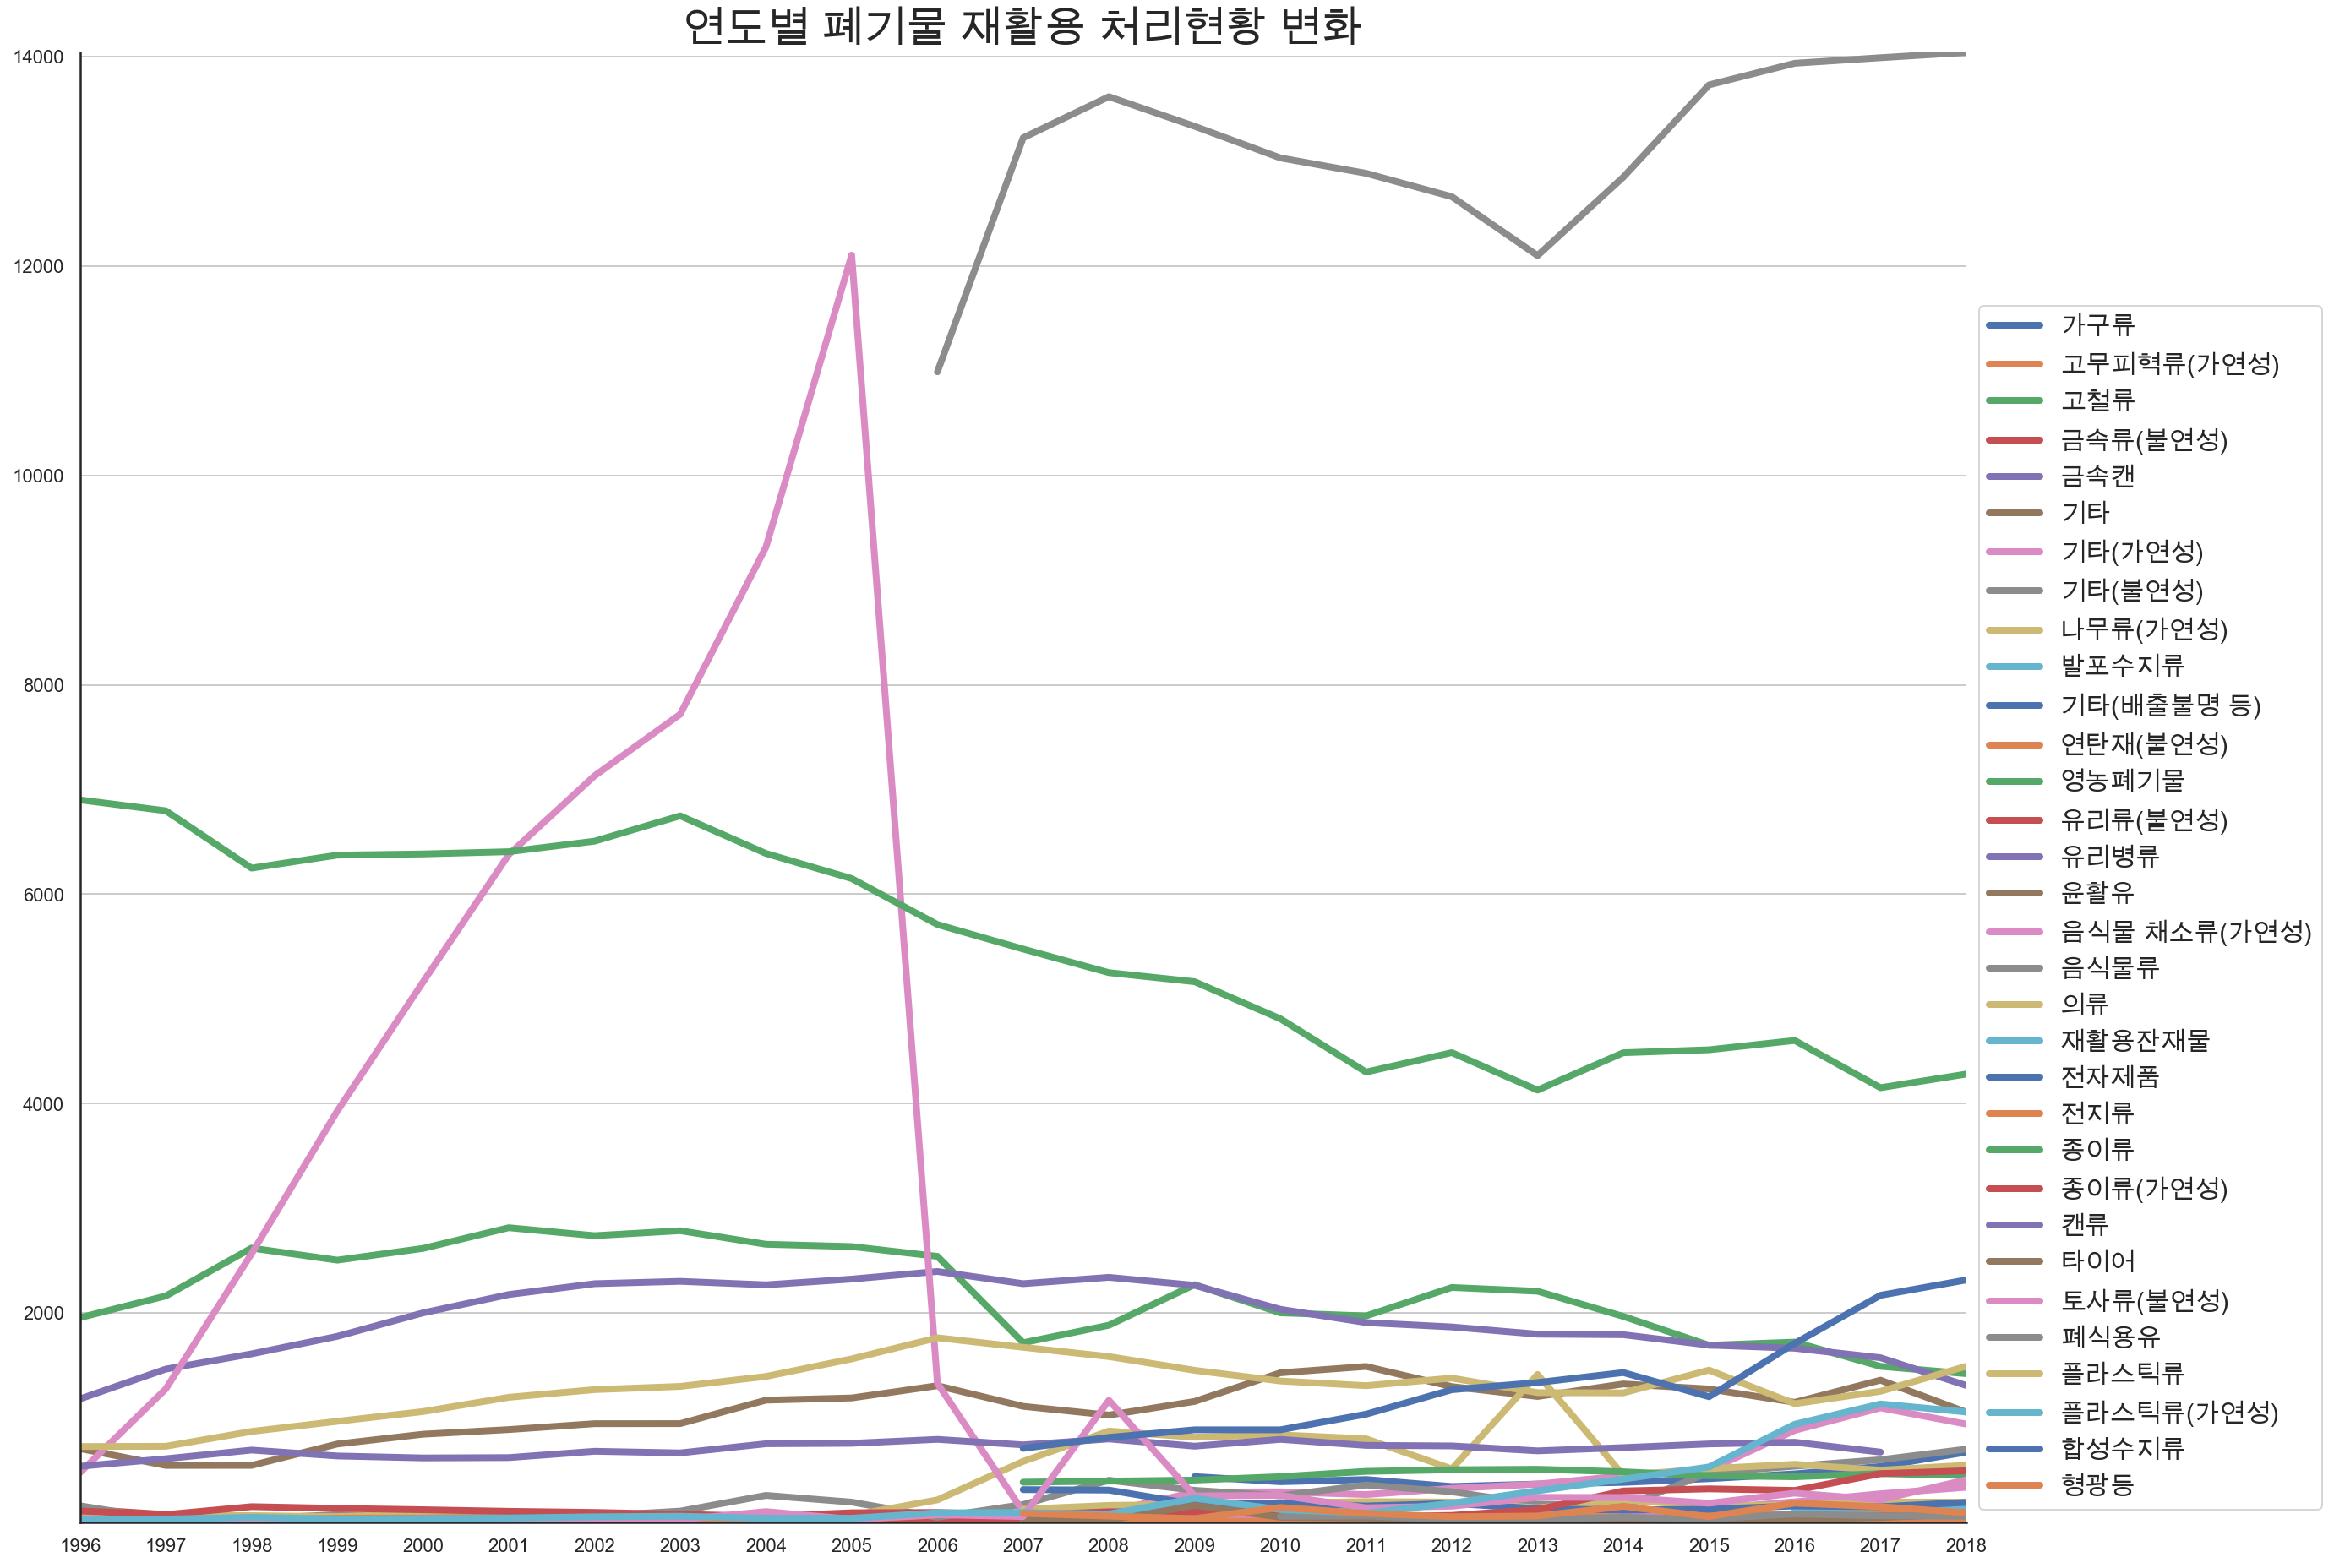

In [23]:
# 분류 전체

fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(recycle_t.index, recycle_t.values, linewidth=4)
plt.legend(recycle_t.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 재활용 처리현황 변화', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.show()

- 상위권 분류만 추출

In [24]:
recycle_7 = recycle_t[['음식물 채소류(가연성)', '음식물류', '종이류(가연성)', '종이류', '플라스틱류(가연성)', '플라스틱류', '금속캔', '캔류', '나무류(가연성)', '유리병류', '고철류']]
recycle_7.fillna(value=0, inplace=True)
recycle_7.head()

/Users/mieyhgnaj/opt/anaconda3/envs/dss16/lib/python3.7/site-packages/pandas/core/frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


음식물 채소류(가연성)  음식물류  종이류(가연성)     종이류  플라스틱류(가연성)   플라스틱류  금속캔     캔류  \
연도                                                                           
1996         475.9   0.0     108.5  6900.4        29.6   724.0  0.0  535.2   
1997        1274.6   0.0      73.7  6796.4        31.2   726.4  0.0  607.2   
1998        2566.0   0.0     149.7  6249.1        48.0   868.2  0.0  690.3   
1999        3928.5   0.0     133.1  6372.9        31.2   964.9  0.0  633.9   
2000        5161.0   0.0     120.1  6384.2        36.1  1058.0  0.0  615.2   

      나무류(가연성)    유리병류     고철류  
연도                              
1996      50.0  1179.3  1955.2  
1997      68.7  1463.8  2162.5  
1998      63.7  1609.2  2619.4  
1999      54.6  1776.4  2504.3  
2000      79.4  2000.6  2616.3

- 연도마다 분류가 조금씩 다름
- 비슷한 분류끼리 합쳐서 현황 파악

In [25]:
recycle7 = recycle_7.copy()

In [26]:
# 종이류 + 종이류(가연성), 금속캔 + 캔류, 음식물 채소류(가연성) + 음식물류, 플라스틱류(가연성) + 플라스틱류

recycle7['종이류'] = recycle7['종이류']+recycle7['종이류(가연성)']
recycle7['캔류'] = recycle7['금속캔']+recycle7['캔류']
recycle7['음식물류'] = recycle7['음식물류']+recycle7['음식물 채소류(가연성)']
recycle7['플라스틱류'] = recycle7['플라스틱류']+recycle7['플라스틱류(가연성)']
recycle7.drop(['종이류(가연성)', '금속캔', '음식물 채소류(가연성)',
               '플라스틱류(가연성)'], axis=1, inplace=True)
recycle7.head()

음식물류     종이류   플라스틱류     캔류  나무류(가연성)    유리병류     고철류
연도                                                           
1996   475.9  7008.9   753.6  535.2      50.0  1179.3  1955.2
1997  1274.6  6870.1   757.6  607.2      68.7  1463.8  2162.5
1998  2566.0  6398.8   916.2  690.3      63.7  1609.2  2619.4
1999  3928.5  6506.0   996.1  633.9      54.6  1776.4  2504.3
2000  5161.0  6504.3  1094.1  615.2      79.4  2000.6  2616.3

In [27]:
# 컬럼명 보기 쉽게 수정
recycle7.columns = ['음식물류', '종이류', '플라스틱류', '캔류', '나무류', '음식물류', '고철류']
recycle7.head()

음식물류     종이류   플라스틱류     캔류   나무류    음식물류     고철류
연도                                                       
1996   475.9  7008.9   753.6  535.2  50.0  1179.3  1955.2
1997  1274.6  6870.1   757.6  607.2  68.7  1463.8  2162.5
1998  2566.0  6398.8   916.2  690.3  63.7  1609.2  2619.4
1999  3928.5  6506.0   996.1  633.9  54.6  1776.4  2504.3
2000  5161.0  6504.3  1094.1  615.2  79.4  2000.6  2616.3

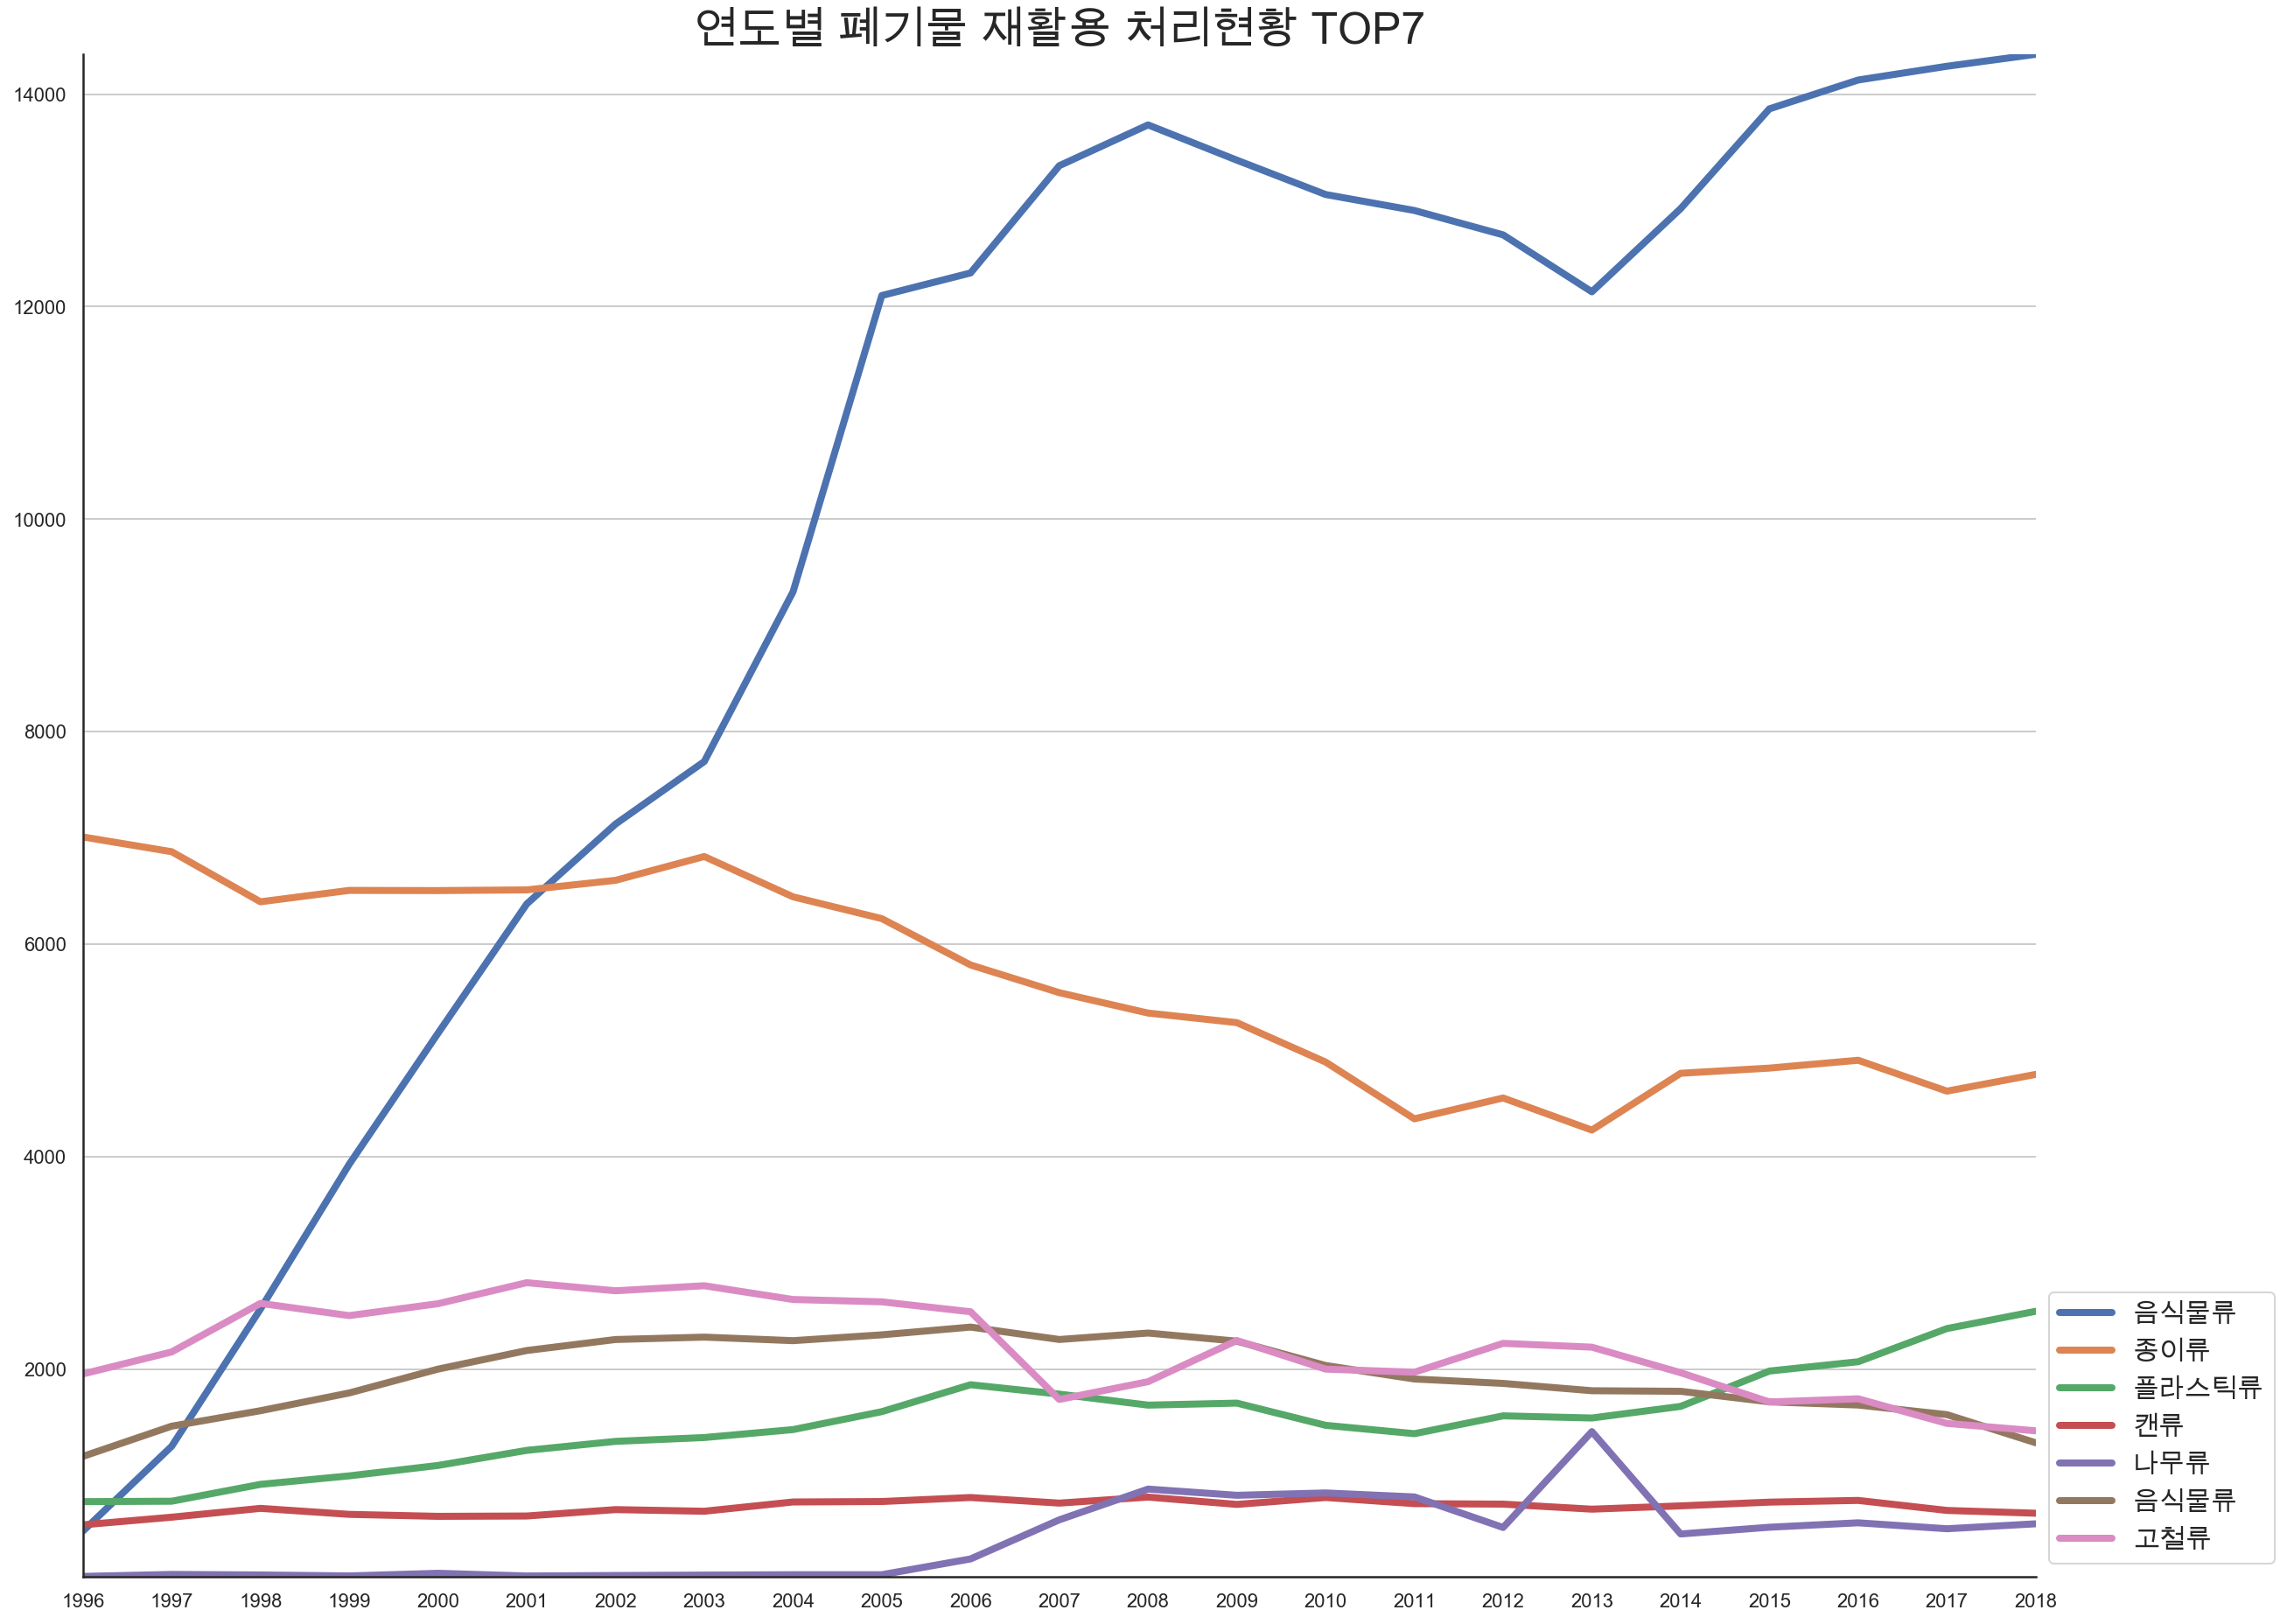

In [28]:
fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(recycle7.index, recycle7.values, linewidth=4)
plt.legend(recycle7.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 재활용 처리현황 TOP7', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.savefig('./image/recycle7.png', dpi=150, bbox_inches='tight')
plt.show()

##  2. ```매립 처리``` 폐기물 연도별 종류별 순위

In [29]:
landfill = pd.pivot_table(df_waste_total_t, index=df_waste_total_t.index, values=['매립 처리량'], columns=['연도'])
landfill.columns = landfill.columns.droplevel([0])
landfill.tail(10)

연도             1996     1997     1998     1999     2000     2001     2002  \
종이류(가연성)     5276.5   4946.9   4257.7   4178.4   3707.6   3592.8   3313.9   
총계          34115.6  30578.5  25073.5  23544.7  21831.2  21000.2  20724.0   
캔류              3.0     13.9     10.5      9.9      8.9     15.1      6.0   
타이어             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
토사류(불연성)     1372.0   1559.5   1130.1    995.9   1070.2   1033.2   1018.0   
폐식용유            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
플라스틱류          12.5     16.2     15.4     14.7     24.7     22.7     32.6   
플라스틱류(가연성)   1907.6   1861.2   1624.1   1719.7   1671.1   1660.0   1670.1   
합성수지류           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
형광등             NaN      NaN      NaN      NaN      NaN      NaN      NaN   

연도             2003     2004     2005  ...    2009    2010    2011    2012  \
종이류(가연성)     3298.1   3252.4   2758.0  ...  1692.4  1562.4  1532.9  1473.8   
총계          20450.1  18195.1  13401.6  ...  9470.8  8797.3  8391.0  7777.7   
캔류              4.5     11.1      4.3  ...     0.0     0.0     0.0     0.0   
타이어             NaN      NaN      NaN  ...     0.0     0.0     0.0     0.0   
토사류(불연성)     1072.7    925.4    872.5  ...   600.0   650.9   779.7   559.5   
폐식용유            NaN      NaN      NaN  ...     NaN     0.0     0.0     0.0   
플라스틱류          36.1     40.1     14.8  ...     0.0     0.0     0.0     0.0   
플라스틱류(가연성)   1615.9   1582.8   1278.5  ...  1012.9   956.5   866.2   825.2   
합성수지류           NaN      NaN      NaN  ...     0.0     0.0     0.0     0.0   
형광등             NaN      NaN      NaN  ...     0.0     0.0     0.0     0.0   

연도            2013    2014    2015    2016    2017    2018  
종이류(가연성)    1437.2  1258.0  1296.9  1391.3  1120.5  1173.0  
총계          7613.5  7813.1  7719.1  7909.2  7240.0  7525.4  
캔류             0.0     0.0     0.0     0.0     0.0     NaN  
타이어            0.0     0.0     0.0     0.0     0.0     0.0  
토사류(불연성)     584.1   618.9   474.1   600.2   347.5   486.4  
폐식용유           0.0     0.0     0.0     0.0     0.0     0.0  
플라스틱류          0.0     0.0     0.0     0.0     0.0     0.0  
플라스틱류(가연성)   824.8   826.4   891.2   901.6   898.6   934.1  
합성수지류          0.0     0.0     0.0     0.0     0.0     0.0  
형광등            0.0     0.0     0.0     0.0     0.0     0.0  

[10 rows x 23 columns]

In [30]:
landfill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 가구류 to 형광등
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1996    17 non-null     float64
 1   1997    17 non-null     float64
 2   1998    17 non-null     float64
 3   1999    17 non-null     float64
 4   2000    17 non-null     float64
 5   2001    17 non-null     float64
 6   2002    17 non-null     float64
 7   2003    17 non-null     float64
 8   2004    17 non-null     float64
 9   2005    17 non-null     float64
 10  2006    18 non-null     float64
 11  2007    26 non-null     float64
 12  2008    26 non-null     float64
 13  2009    28 non-null     float64
 14  2010    29 non-null     float64
 15  2011    29 non-null     float64
 16  2012    29 non-null     float64
 17  2013    29 non-null     float64
 18  2014    29 non-null     float64
 19  2015    29 non-null     float64
 20  2016    31 non-null     float64
 21  2017    31 non-null     float64
 22  2018  

In [31]:
# 총계, 소계(소계) 인덱스 삭제
landfill.drop(['총계', '소계(소계)'], inplace=True)

In [32]:
# 인덱스명 수정
landfill.rename(index={'소계(기타(배출불명 등))':'기타(배출불명 등)'}, inplace=True)

In [33]:
len(landfill.index)

32

In [34]:
landfill

연도               1996     1997    1998    1999    2000    2001    2002  \
가구류               NaN      NaN     NaN     NaN     NaN     NaN     NaN   
고무피혁류(가연성)      997.6    947.8   908.2   838.3   856.6   792.4   835.5   
고철류              22.0     20.4    30.8    26.6    12.4    11.4    11.7   
금속류(불연성)       1408.2   1304.7  1026.1   973.0   914.7   904.6   853.9   
금속캔               NaN      NaN     NaN     NaN     NaN     NaN     NaN   
기타               39.7     15.5    52.5    44.8    61.8    42.2    44.8   
기타(가연성)        3816.5   3796.6  3330.6  3761.9  4196.5  4388.7  5047.5   
기타(불연성)        2487.7   2405.8  2146.5  2185.6  2288.0  2823.4  2703.9   
나무류(가연성)       1420.7   1391.3  1255.5  1207.5  1183.0  1261.5  1326.6   
발포수지류             NaN      NaN     NaN     NaN     NaN     NaN     NaN   
기타(배출불명 등)        NaN      NaN     NaN     NaN     NaN     NaN     NaN   
연탄재(불연성)       1821.6   1248.5   893.9   705.1   605.9   550.4   486.9   
영농폐기물             NaN      NaN     NaN     NaN     NaN     NaN     NaN   
유리류(불연성)          NaN      NaN     NaN     NaN     NaN     NaN     NaN   
유리병류             19.5     20.2    27.8    25.2    16.6    29.5    13.8   
윤활유               NaN      NaN     NaN     NaN     NaN     NaN     NaN   
음식물 채소류(가연성)  13486.4  10973.5  8308.9  6802.8  5185.4  3855.2  3345.4   
음식물류              NaN      NaN     NaN     NaN     NaN     NaN     NaN   
의류                NaN      NaN     NaN     NaN     NaN     NaN     NaN   
재활용잔재물            NaN      NaN     NaN     NaN     NaN     NaN     NaN   
전자제품              NaN      NaN     NaN     NaN     NaN     NaN     NaN   
전지류               NaN      NaN     NaN     NaN     NaN     NaN     NaN   
종이류              24.1     56.5    54.9    55.3    27.8    17.1    13.4   
종이류(가연성)       5276.5   4946.9  4257.7  4178.4  3707.6  3592.8  3313.9   
캔류                3.0     13.9    10.5     9.9     8.9    15.1     6.0   
타이어               NaN      NaN     NaN     NaN     NaN     NaN     NaN   
토사류(불연성)       1372.0   1559.5  1130.1   995.9  1070.2  1033.2  1018.0   
폐식용유              NaN      NaN     NaN     NaN     NaN     NaN     NaN   
플라스틱류            12.5     16.2    15.4    14.7    24.7    22.7    32.6   
플라스틱류(가연성)     1907.6   1861.2  1624.1  1719.7  1671.1  1660.0  1670.1   
합성수지류             NaN      NaN     NaN     NaN     NaN     NaN     NaN   
형광등               NaN      NaN     NaN     NaN     NaN     NaN     NaN   

연도              2003    2004    2005  ...    2009    2010    2011    2012  \
가구류              NaN     NaN     NaN  ...     0.0     0.0     0.0     0.0   
고무피혁류(가연성)     831.2   791.7   655.9  ...   304.7   262.2   261.0   258.3   
고철류              7.2    27.9     5.8  ...     0.0     0.0     0.0     0.0   
금속류(불연성)       862.4   815.4   682.2  ...   295.5   271.7   262.7   257.1   
금속캔              NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
기타              37.7    35.2    10.8  ...     0.0     0.0     0.0     0.0   
기타(가연성)       5082.9  4292.9  3150.6  ...  2896.9  2599.6  2189.0  1875.1   
기타(불연성)       2935.2  2997.5  2011.3  ...  1644.9  1587.6  1630.4  1663.8   
나무류(가연성)      1228.7  1204.5   973.0  ...   402.0   375.5   345.6   356.4   
발포수지류            NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
기타(배출불명 등)       NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
연탄재(불연성)       551.0   541.7   583.2  ...     NaN     NaN     NaN     NaN   
영농폐기물            NaN     NaN     NaN  ...     0.0     0.0     0.0     0.0   
유리류(불연성)         NaN     NaN     NaN  ...   340.4   336.8   356.4   356.2   
유리병류            23.7    25.1    16.7  ...     0.0     0.0     0.0     0.0   
윤활유              NaN     NaN     NaN  ...     0.0     0.0     0.0     0.0   
음식물 채소류(가연성)  2835.7  1606.8   356.2  ...   214.4    85.8    64.7    63.8   
음식물류             NaN     NaN     NaN  ...    66.7   108.3   102.5    88.5   
의류               NaN     NaN     NaN  ...     0.0     0.0     0.0     0.0   
재활용잔재물           

In [35]:
len(landfill)

32

### 2-1. bar (연도별 구분)

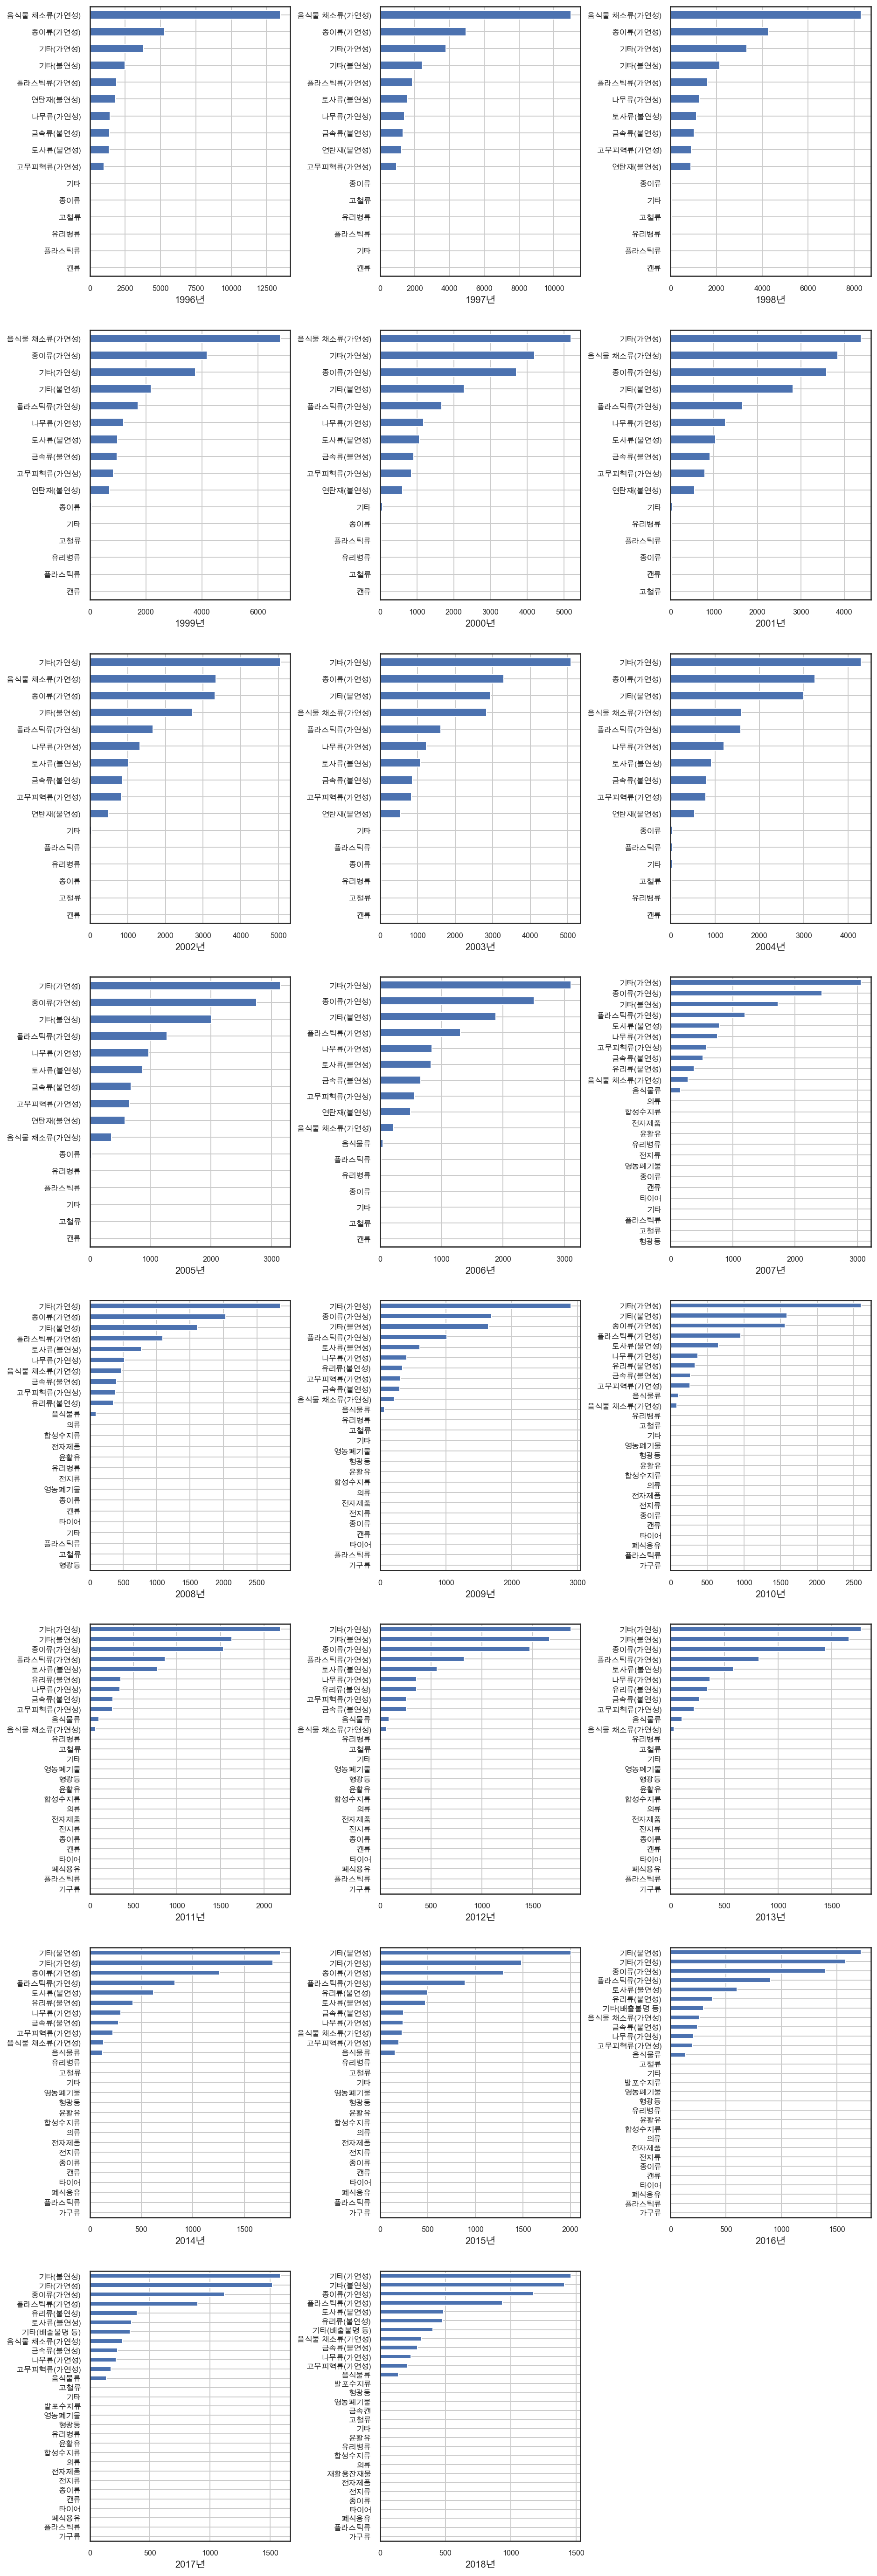

In [36]:
num = 1

for i in range(1996, 2019):
    plt.subplot(8, 3, num)
    landfill[i].dropna().sort_values().plot(
        kind='barh', grid=True, figsize=(15, 50), fontsize=8)
    plt.xlabel(str(i)+'년', fontsize=10)
    num += 1

plt.subplots_adjust(wspace=0.45)
plt.savefig('./image/landfill_year_bar.png', dpi=150, bbox_inches='tight')
plt.show()

- 1996년 ~ 2000년까지 매립량 1위였던 음식물 채소류가 2001년 이후 급격히 줄어들기 시작하더니\
2005년 이후로는 순위권 밖으로 밀려남
- 그 밖에 종이류, 플라스틱류(가연성), 나무류, 유리류등은 꾸준히 순위권을 지키고 있음
- 위 그래프를 통해 '음식물 채소류 매립량'의 감소를 확인 할 수 있으나 다른 분류의 변화는 직관적으로 확인 할 수 없음

### 2-2. line (연도별 TOP7)

In [37]:
landfill_t = landfill.T
landfill_t

가구류  고무피혁류(가연성)   고철류  금속류(불연성)  금속캔    기타  기타(가연성)  기타(불연성)  나무류(가연성)  \
연도                                                                             
1996  NaN       997.6  22.0    1408.2  NaN  39.7   3816.5   2487.7    1420.7   
1997  NaN       947.8  20.4    1304.7  NaN  15.5   3796.6   2405.8    1391.3   
1998  NaN       908.2  30.8    1026.1  NaN  52.5   3330.6   2146.5    1255.5   
1999  NaN       838.3  26.6     973.0  NaN  44.8   3761.9   2185.6    1207.5   
2000  NaN       856.6  12.4     914.7  NaN  61.8   4196.5   2288.0    1183.0   
2001  NaN       792.4  11.4     904.6  NaN  42.2   4388.7   2823.4    1261.5   
2002  NaN       835.5  11.7     853.9  NaN  44.8   5047.5   2703.9    1326.6   
2003  NaN       831.2   7.2     862.4  NaN  37.7   5082.9   2935.2    1228.7   
2004  NaN       791.7  27.9     815.4  NaN  35.2   4292.9   2997.5    1204.5   
2005  NaN       655.9   5.8     682.2  NaN  10.8   3150.6   2011.3     973.0   
2006  NaN       562.5   2.4     659.4  NaN   6.2   3107.4   1885.0     843.7   
2007  NaN       577.2   0.0     519.6  NaN   0.0   3061.2   1730.4     754.4   
2008  NaN       386.5   0.0     402.3  NaN   0.0   2853.6   1607.1     518.0   
2009  0.0       304.7   0.0     295.5  NaN   0.0   2896.9   1644.9     402.0   
2010  0.0       262.2   0.0     271.7  NaN   0.0   2599.6   1587.6     375.5   
2011  0.0       261.0   0.0     262.7  NaN   0.0   2189.0   1630.4     345.6   
2012  0.0       258.3   0.0     257.1  NaN   0.0   1875.1   1663.8     356.4   
2013  0.0       221.7   0.0     267.7  NaN   0.0   1773.0   1660.0     365.8   
2014  0.0       224.2   0.0     280.2  NaN   0.0   1777.9   1850.3     300.6   
2015  0.0       194.6   0.0     243.7  NaN   0.0   1488.9   2005.7     239.2   
2016  0.0       196.9   0.0     243.5  NaN   0.0   1580.1   1717.0     206.3   
2017  0.0       177.5   0.0     229.4  NaN   0.0   1519.7   1587.2     218.6   
2018  0.0       206.6   0.0     286.0  0.0   0.0   1458.0   1408.0     236.1   

      발포수지류  ...   종이류  종이류(가연성)    캔류  타이어  토사류(불연성)  폐식용유  플라스틱류  \
연도           ...                                                     
1996    NaN  ...  24.1    5276.5   3.0  NaN    1372.0   NaN   12.5   
1997    NaN  ...  56.5    4946.9  13.9  NaN    1559.5   NaN   16.2   
1998    NaN  ...  54.9    4257.7  10.5  NaN    1130.1   NaN   15.4   
1999    NaN  ...  55.3    4178.4   9.9  NaN     995.9   NaN   14.7   
2000    NaN  ...  27.8    3707.6   8.9  NaN    1070.2   NaN   24.7   
2001    NaN  ...  17.1    3592.8  15.1  NaN    1033.2   NaN   22.7   
2002    NaN  ...  13.4    3313.9   6.0  NaN    1018.0   NaN   32.6   
2003    NaN  ...  27.1    3298.1   4.5  NaN    1072.7   NaN   36.1   
2004    NaN  ...  44.5    3252.4  11.1  NaN     925.4   NaN   40.1   
2005    NaN  ...  27.8    2758.0   4.3  NaN     872.5   NaN   14.8   
2006    NaN  ...   9.4    2511.5   1.7  NaN     826.5   NaN   13.4   
2007    NaN  ...   0.0    2433.7   0.0  0.0     781.5   NaN    0.0   
2008    NaN  ...   0.0    2038.1   0.0  0.0     770.7   NaN    0.0   
2009    NaN  ...   0.0    1692.4   0.0  0.0     600.0   NaN    0.0   
2010    NaN  ...   0.0    1562.4   0.0  0.0     650.9   0.0    0.0   
2011    NaN  ...   0.0    1532.9   0.0  0.0     779.7   0.0    0.0   
2012    NaN  ...   0.0    1473.8   0.0  0.0     559.5   0.0    0.0   
2013    NaN  ...   0.0    1437.2   0.0  0.0     584.1   0.0    0.0   
2014    NaN  ...   0.0    1258.0   0.0  0.0     618.9   0.0    0.0   
2015    NaN  ...   0.0    1296.9   0.0  0.0     474.1   0.0    0.0   
2016    0.0  ...   0.0    1391.3   0.0  0.0     600.2   0.0    0.0   
2017    0.0  ...   0.0    1120.5   0.0  0.0     347.5   0.0    0.0   
2018    0.0  ...   0.0    1173.0   NaN  0.0     486.4   0.0    0.0   

      플라스틱류(가연성)  합성수지류  형광등  
연도                            
1996      1907.6    NaN  NaN  
1997      1861.2    NaN  NaN  
1998      1624.1    NaN  NaN  
1999      1719.7    NaN  NaN  
2000      1671.1    NaN  NaN  
2001      1660.0    NaN  NaN  
2002  

In [38]:
landfill_t.index = landfill_t.index.astype(str)

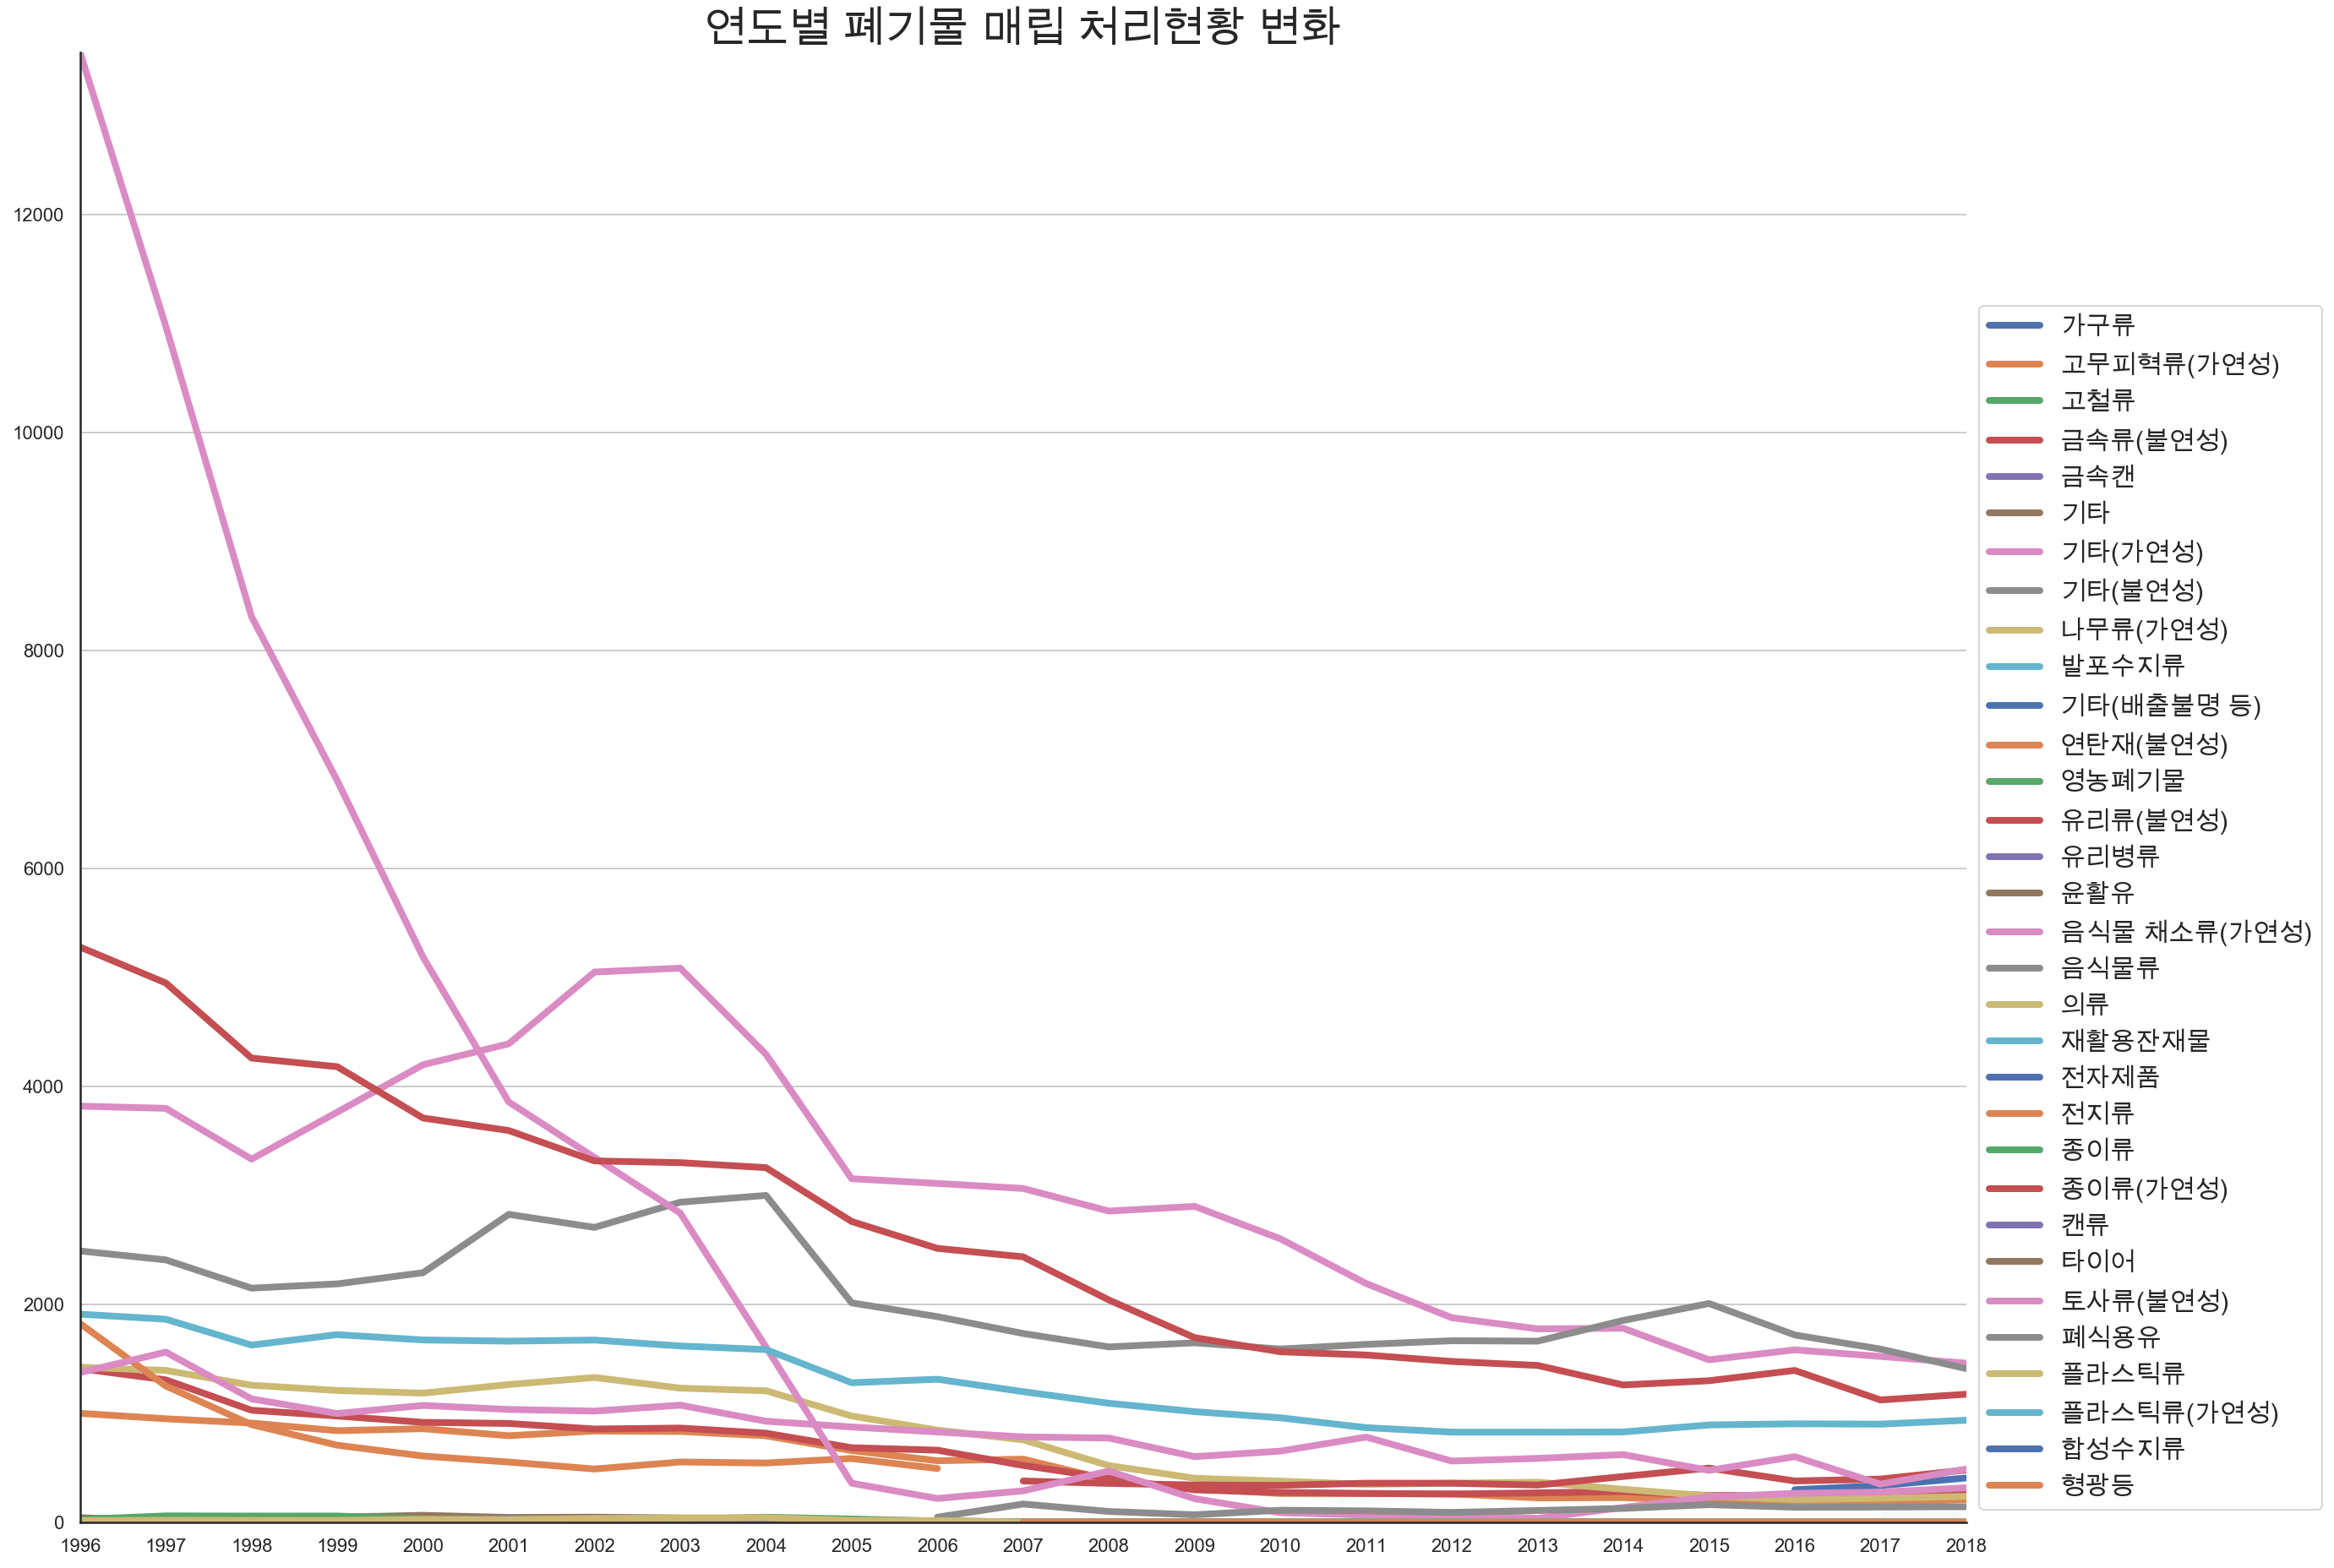

In [39]:
# 분류 전체

fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(landfill_t.index, landfill_t.values, linewidth=4)
plt.legend(landfill_t.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 매립 처리현황 변화', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.show()

- 상위권 분류만 추출

In [40]:
landfill_7 = landfill_t[['음식물 채소류(가연성)', '음식물류', '종이류(가연성)', '종이류', '플라스틱류(가연성)', '플라스틱류', '연탄재(불연성)', '나무류(가연성)', '토사류(불연성)', '금속류(불연성)']]
landfill_7.fillna(value=0, inplace=True)
landfill_7.head()

/Users/mieyhgnaj/opt/anaconda3/envs/dss16/lib/python3.7/site-packages/pandas/core/frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


음식물 채소류(가연성)  음식물류  종이류(가연성)   종이류  플라스틱류(가연성)  플라스틱류  연탄재(불연성)  \
연도                                                                      
1996       13486.4   0.0    5276.5  24.1      1907.6   12.5    1821.6   
1997       10973.5   0.0    4946.9  56.5      1861.2   16.2    1248.5   
1998        8308.9   0.0    4257.7  54.9      1624.1   15.4     893.9   
1999        6802.8   0.0    4178.4  55.3      1719.7   14.7     705.1   
2000        5185.4   0.0    3707.6  27.8      1671.1   24.7     605.9   

      나무류(가연성)  토사류(불연성)  금속류(불연성)  
연도                                  
1996    1420.7    1372.0    1408.2  
1997    1391.3    1559.5    1304.7  
1998    1255.5    1130.1    1026.1  
1999    1207.5     995.9     973.0  
2000    1183.0    1070.2     914.7

- 연도마다 분류가 조금씩 다름
- 비슷한 분류끼리 합쳐서 현황 파악

In [41]:
landfill7 = landfill_7.copy()

In [42]:
# 종이류 + 종이류(가연성), 음식물 채소류(가연성) + 음식물류, 플라스틱류(가연성) + 플라스틱류

landfill7['종이류'] = landfill7['종이류']+landfill7['종이류(가연성)']
landfill7['음식물류'] = landfill7['음식물류']+landfill7['음식물 채소류(가연성)']
landfill7['플라스틱류'] = landfill7['플라스틱류']+landfill7['플라스틱류(가연성)']
landfill7.drop(['종이류(가연성)', '음식물 채소류(가연성)',
                '플라스틱류(가연성)'], axis=1, inplace=True)
landfill7.head()

음식물류     종이류   플라스틱류  연탄재(불연성)  나무류(가연성)  토사류(불연성)  금속류(불연성)
연도                                                                   
1996  13486.4  5300.6  1920.1    1821.6    1420.7    1372.0    1408.2
1997  10973.5  5003.4  1877.4    1248.5    1391.3    1559.5    1304.7
1998   8308.9  4312.6  1639.5     893.9    1255.5    1130.1    1026.1
1999   6802.8  4233.7  1734.4     705.1    1207.5     995.9     973.0
2000   5185.4  3735.4  1695.8     605.9    1183.0    1070.2     914.7

In [43]:
# 컬럼명 보기 쉽게 수정
landfill7.columns = ['음식물류', '종이류', '플라스틱류', '연탄재', '나무류', '토사류', '금속류']
landfill7.head()

음식물류     종이류   플라스틱류     연탄재     나무류     토사류     금속류
연도                                                           
1996  13486.4  5300.6  1920.1  1821.6  1420.7  1372.0  1408.2
1997  10973.5  5003.4  1877.4  1248.5  1391.3  1559.5  1304.7
1998   8308.9  4312.6  1639.5   893.9  1255.5  1130.1  1026.1
1999   6802.8  4233.7  1734.4   705.1  1207.5   995.9   973.0
2000   5185.4  3735.4  1695.8   605.9  1183.0  1070.2   914.7

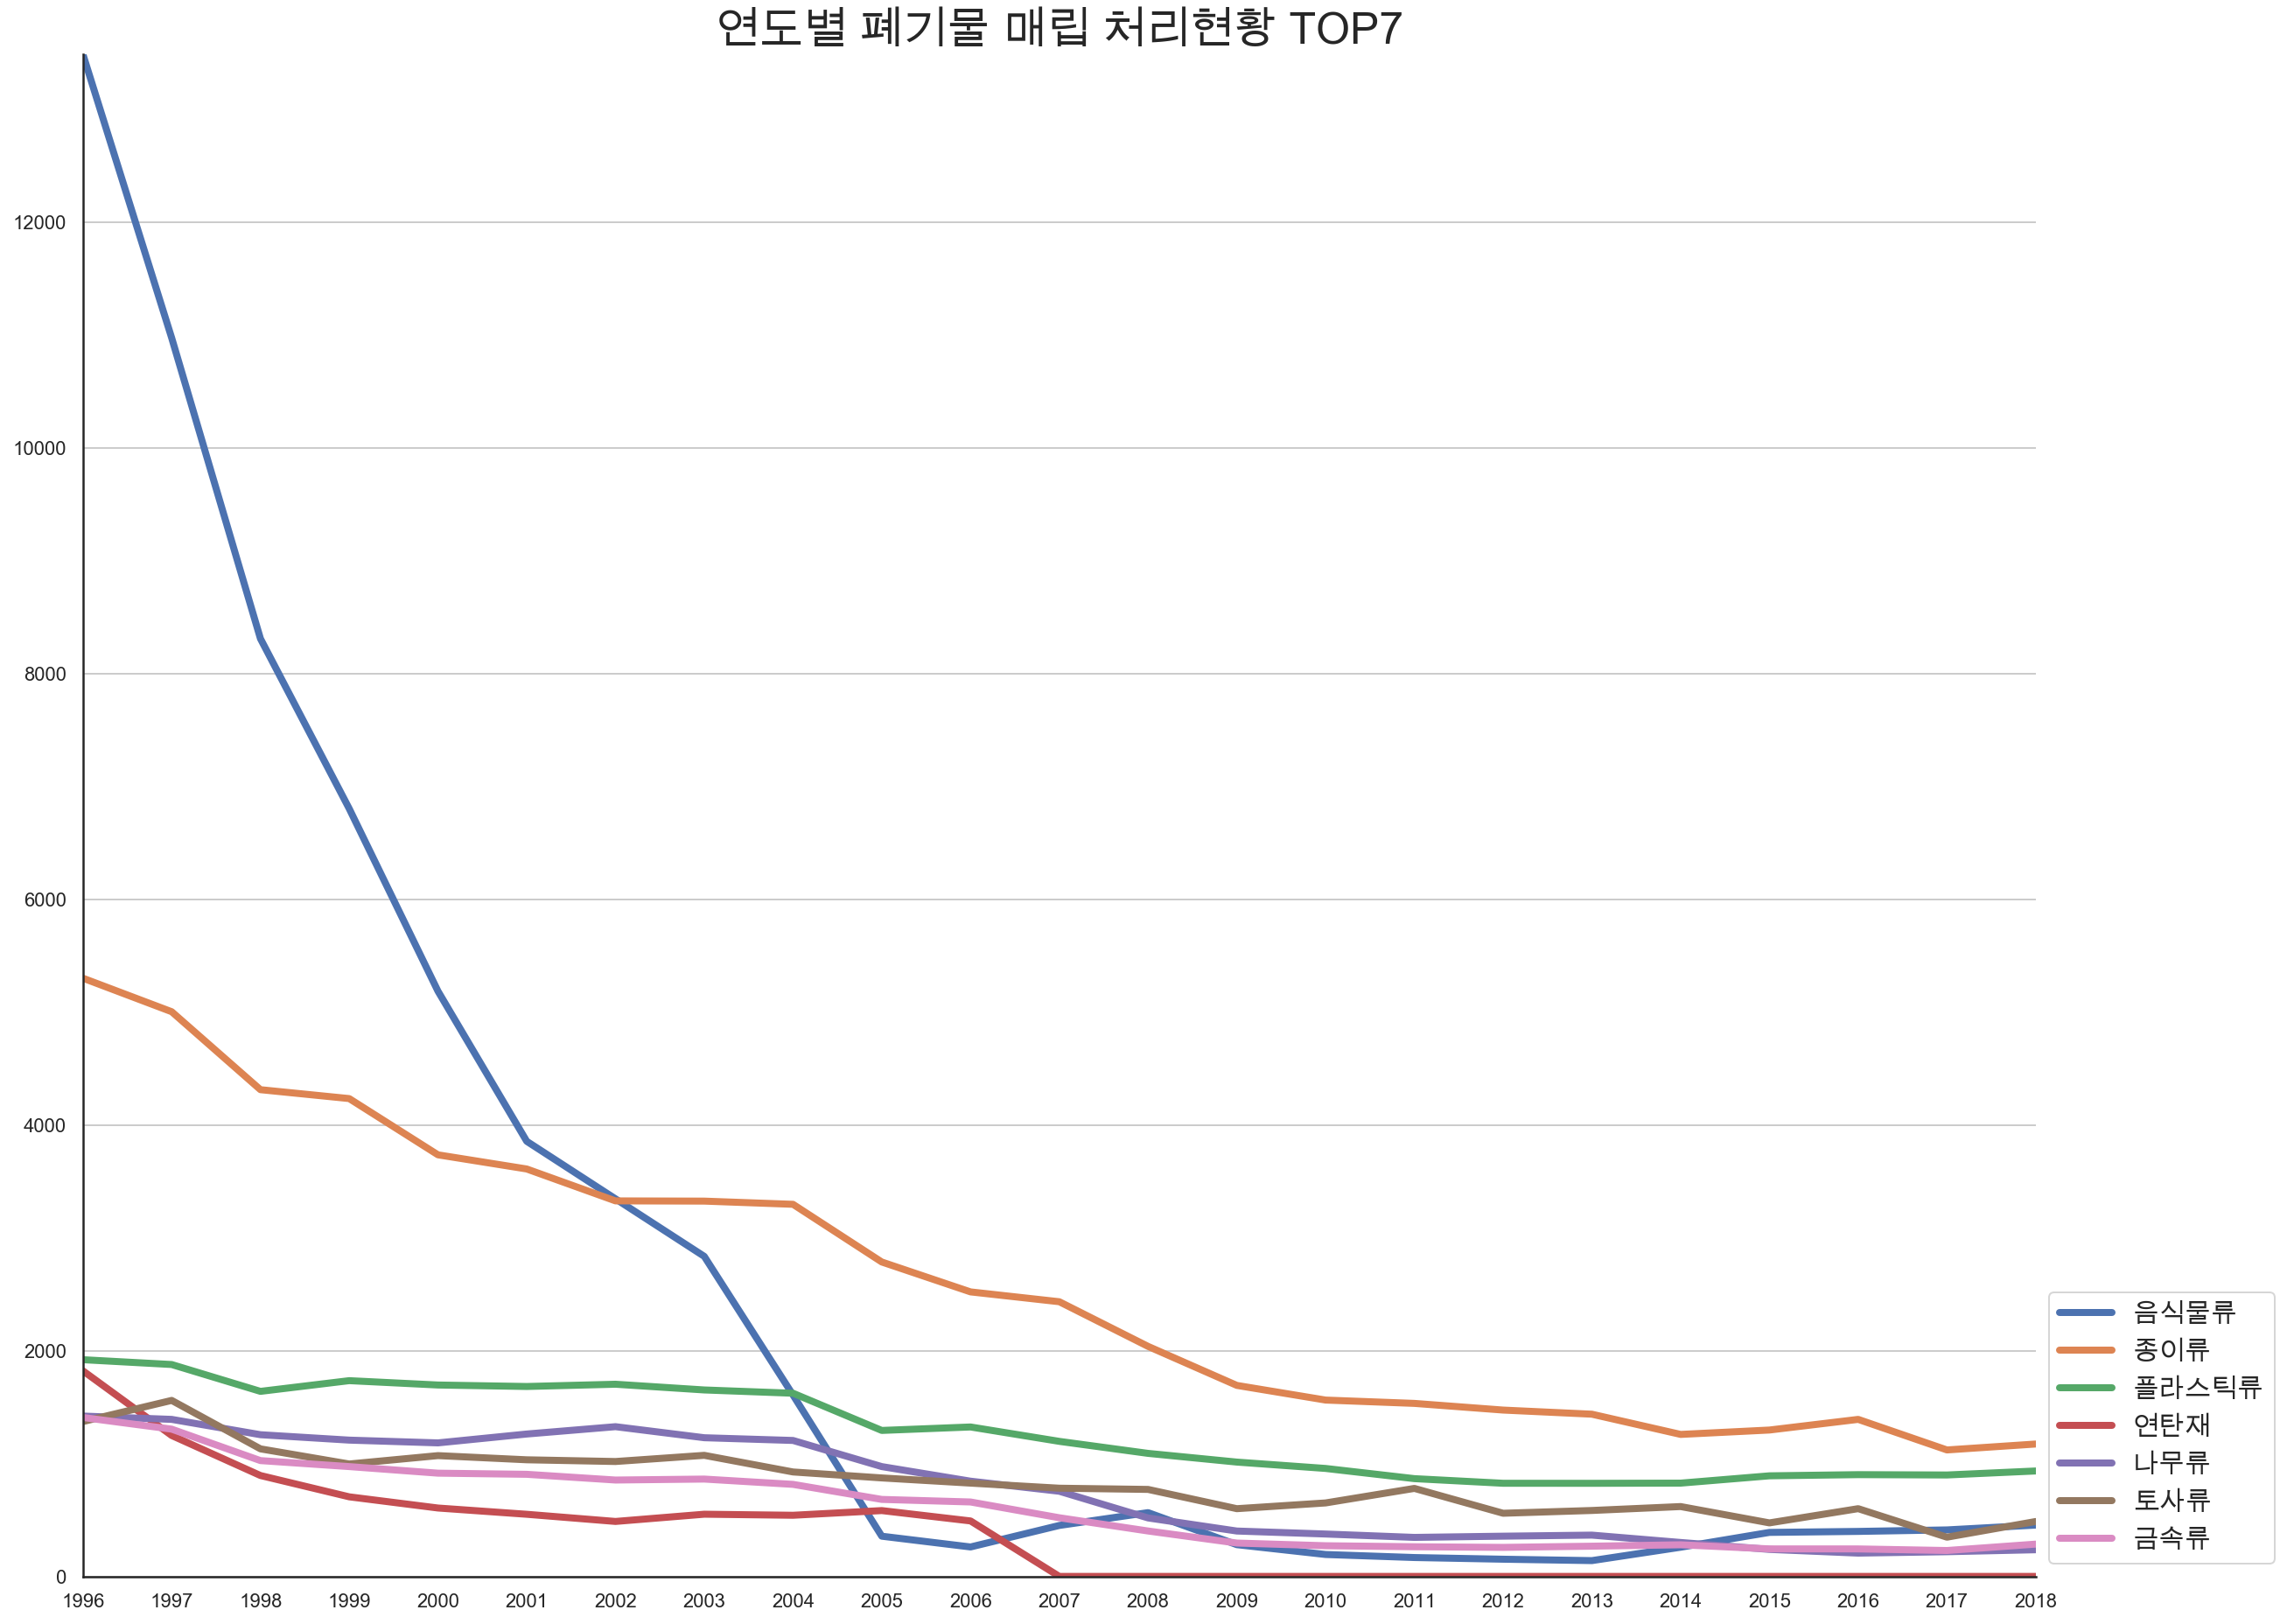

In [44]:
fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(landfill7.index, landfill7.values, linewidth=4)
plt.legend(landfill7.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 매립 처리현황 TOP7', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.savefig('./image/landfill7.png', dpi=150, bbox_inches='tight')
plt.show()

##  3. ```소각 처리``` 폐기물 연도별 종류별 순위

In [45]:
incineration = pd.pivot_table(df_waste_total_t, index=df_waste_total_t.index, values=['소각 처리량'], columns=['연도'])
incineration.columns = incineration.columns.droplevel([0])
incineration.tail(10)

연도            1996    1997    1998    1999    2000    2001    2002    2003  \
종이류(가연성)     994.7  1036.4  1212.6  1474.1  1749.2  2047.9  2231.9  2248.7   
총계          2725.0  3409.0  3943.1  4675.5  5440.1  6576.3  7229.3  7348.3   
캔류             0.0     0.0     0.1     0.0     0.0     0.0     1.2     1.5   
타이어            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
토사류(불연성)       0.0     2.8     3.2     0.1     0.3     0.2     0.4     2.4   
폐식용유           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
플라스틱류         13.1    12.9    17.1     9.1    15.1     8.8    12.8    16.3   
플라스틱류(가연성)   229.2   352.9   402.5   580.4   652.2   779.5   969.0   931.3   
합성수지류          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
형광등            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

연도            2004    2005  ...     2009     2010     2011     2012     2013  \
종이류(가연성)    2425.8  2623.8  ...   3125.2   3139.8   3351.3   3707.2   3823.6   
총계          7224.3  7753.3  ...  10308.8  10608.8  11604.5  12261.1  12330.8   
캔류             3.2     0.8  ...      0.0      0.0      0.0      0.0      0.0   
타이어            NaN     NaN  ...      0.0      0.0      0.0      0.0      0.0   
토사류(불연성)       0.0     0.3  ...     20.6     14.7     18.8     23.9     83.0   
폐식용유           NaN     NaN  ...      NaN      0.0      0.0      0.0      0.0   
플라스틱류         10.8    12.2  ...      0.0      0.0      0.0      0.0      0.0   
플라스틱류(가연성)  1020.9  1172.4  ...   1575.0   1562.3   1690.4   2001.4   1999.8   
합성수지류          NaN     NaN  ...      0.0      0.0      0.0      0.0      0.0   
형광등            NaN     NaN  ...      0.0      0.0      0.0      0.0      0.0   

연도             2014     2015     2016     2017     2018  
종이류(가연성)     3852.6   3827.6   3935.3   3608.1   3519.0  
총계          12647.5  13175.5  13609.8  13318.1  13762.9  
캔류              0.0      0.0      0.0      0.0      NaN  
타이어             0.0      0.0      0.0      0.0      0.0  
토사류(불연성)       60.1     44.6    101.5     77.7     38.3  
폐식용유            0.0      0.0      0.0      0.0      0.0  
플라스틱류           0.0      0.0      0.0      0.0      0.0  
플라스틱류(가연성)   2130.4   2318.8   2473.8   2571.4   2896.0  
합성수지류           0.0      0.0      0.0      0.0      0.0  
형광등             0.0      0.0      0.0      0.0      0.0  

[10 rows x 23 columns]

In [46]:
incineration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 가구류 to 형광등
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1996    17 non-null     float64
 1   1997    17 non-null     float64
 2   1998    17 non-null     float64
 3   1999    17 non-null     float64
 4   2000    17 non-null     float64
 5   2001    17 non-null     float64
 6   2002    17 non-null     float64
 7   2003    17 non-null     float64
 8   2004    17 non-null     float64
 9   2005    17 non-null     float64
 10  2006    18 non-null     float64
 11  2007    26 non-null     float64
 12  2008    26 non-null     float64
 13  2009    28 non-null     float64
 14  2010    29 non-null     float64
 15  2011    29 non-null     float64
 16  2012    29 non-null     float64
 17  2013    29 non-null     float64
 18  2014    29 non-null     float64
 19  2015    29 non-null     float64
 20  2016    31 non-null     float64
 21  2017    31 non-null     float64
 22  2018  

In [47]:
# 총계, 소계(소계) 인덱스 삭제
incineration.drop(['총계', '소계(소계)'], inplace=True)

In [48]:
# 인덱스명 수정
incineration.rename(index={'소계(기타(배출불명 등))':'기타(배출불명 등)'}, inplace=True)

In [49]:
len(incineration.index)

32

In [50]:
incineration

연도             1996    1997    1998    1999    2000    2001    2002    2003  \
가구류             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
고무피혁류(가연성)    111.3   149.0   217.8   258.0   298.1   392.3   433.6   449.6   
고철류             0.0     0.0     0.5     0.0     0.0     0.0     0.8     2.6   
금속류(불연성)       12.0    22.2     2.5     8.6     0.5    11.1     1.6     1.3   
금속캔             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
기타              7.7     9.3     9.0    26.5    10.4     6.7    35.3    32.1   
기타(가연성)       377.6   543.1   592.5   843.8   910.3  1168.5  1586.4  1600.5   
기타(불연성)         1.0     4.2    15.9    20.3     3.3    68.9     3.1    33.5   
나무류(가연성)      386.0   445.3   528.4   600.2   702.7  1084.4  1014.8  1163.0   
발포수지류           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
기타(배출불명 등)      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
연탄재(불연성)        0.0     0.0     0.0     1.4     0.6     0.0     0.5     0.0   
영농폐기물           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
유리류(불연성)        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
유리병류            0.0     0.0     0.5     2.0     0.0     0.0     5.8     8.3   
윤활유             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
음식물 채소류(가연성)  569.5   814.6   923.0   845.8  1087.7  1003.1   922.0   844.3   
음식물류            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
의류              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
재활용잔재물          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
전자제품            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
전지류             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
종이류            22.9    16.3    17.5     5.2     9.7     4.9    10.1    12.9   
종이류(가연성)      994.7  1036.4  1212.6  1474.1  1749.2  2047.9  2231.9  2248.7   
캔류              0.0     0.0     0.1     0.0     0.0     0.0     1.2     1.5   
타이어             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
토사류(불연성)        0.0     2.8     3.2     0.1     0.3     0.2     0.4     2.4   
폐식용유            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
플라스틱류          13.1    12.9    17.1     9.1    15.1     8.8    12.8    16.3   
플라스틱류(가연성)    229.2   352.9   402.5   580.4   652.2   779.5   969.0   931.3   
합성수지류           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
형광등             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

연도              2004    2005  ...    2009    2010    2011    2012    2013  \
가구류              NaN     NaN  ...     0.0     0.0     0.0     0.0     0.0   
고무피혁류(가연성)     496.9   539.7  ...   664.8   628.4   652.5   766.7   724.4   
고철류              0.0     1.7  ...     0.0     0.0     0.0     0.0     0.0   
금속류(불연성)         0.0     0.0  ...    31.7    38.7    42.8    46.0    61.6   
금속캔              NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
기타              35.6    13.8  ...     0.0     0.0     0.0     0.0     0.0   
기타(가연성)       1530.5  1606.6  ...  3186.4  3598.0  3982.0  3952.1  3881.0   
기타(불연성)          1.5    34.4  ...    87.7   161.3   181.1   204.9   286.6   
나무류(가연성)      1150.5  1222.6  ...  1125.3   994.0  1170.5  1115.4   997.9   
발포수지류            NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
기타(배출불명 등)       NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
연탄재(불연성)         0.0     0.0  ...     NaN     NaN     NaN     NaN     NaN   
영농폐기물            NaN     NaN  ...     0.0     0.0     0.0     0.0     0.0   
유리류(불연성)         NaN     NaN  ...    33.1    49.5    49.7    62.4    88.8   
유리병류             0.2     0.9  ...     0.0     0.0     0.0     0.0     0.0   
윤활유              NaN     NaN  ...     0.0     0.0     0.0     0.0     0.0   
음식물 채소류(가연성)   540.8   516.2  ...   158.9   134.1   188.9    94.7    88.1   
음식물류  

In [51]:
len(incineration.columns)

23

### 3-1. bar (연도별 구분)

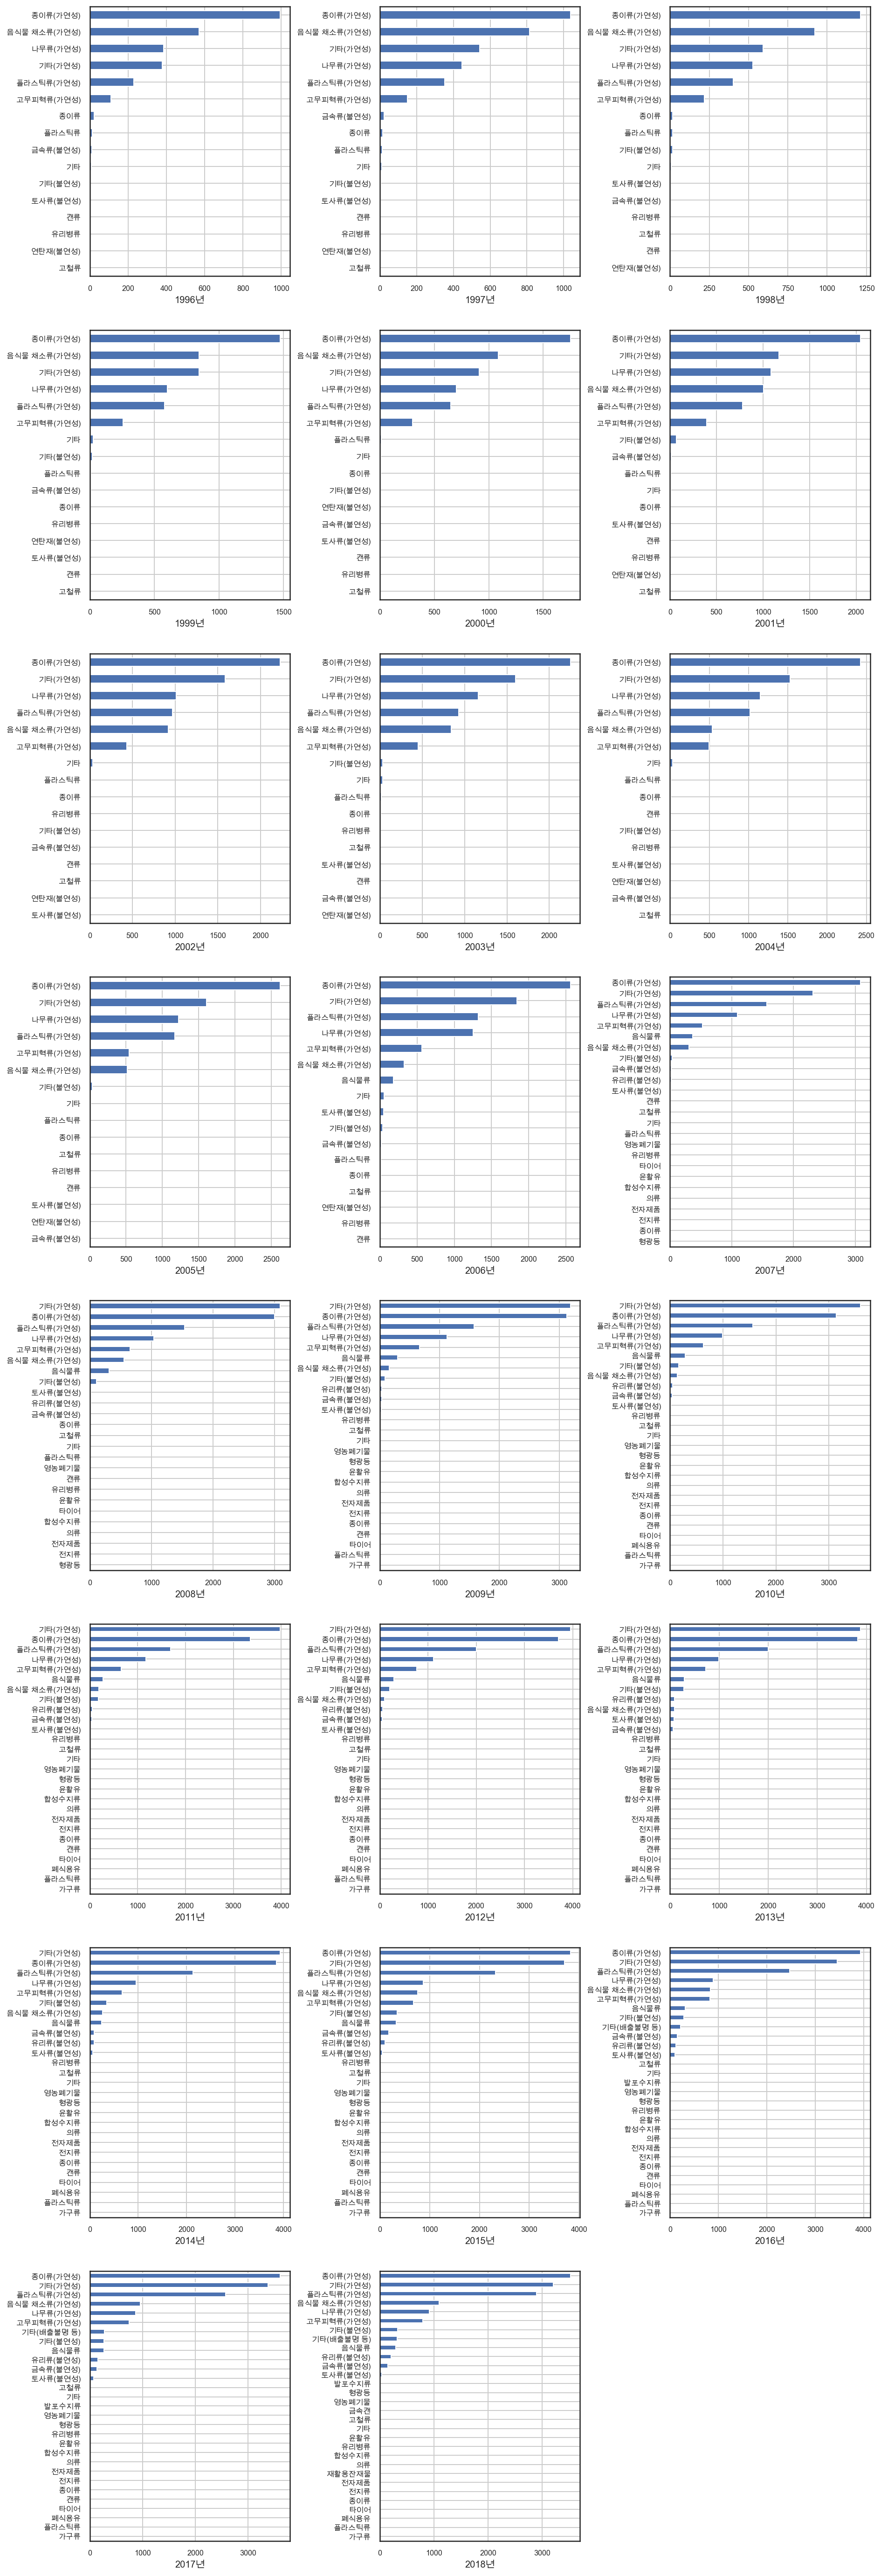

In [52]:
num = 1

for i in range(1996, 2019):
    plt.subplot(8, 3, num)
    incineration[i].dropna().sort_values().plot(
        kind='barh', grid=True, figsize=(15, 50), fontsize=8)
    plt.xlabel(str(i)+'년', fontsize=10)
    num += 1

plt.subplots_adjust(wspace=0.45)
plt.savefig('./image/incineration_year_bar.png', dpi=150, bbox_inches='tight')
plt.show()

- 90년 후반까지만 해도 종이류가 월등히 높았음
- 하지만, 최근 들어서 플라스틱류가 종이류와 거의 비슷할만큼 소각량이 늘어남

### 3-2. line (연도별 TOP7)

In [53]:
incineration_t = incineration.T
incineration_t

가구류  고무피혁류(가연성)  고철류  금속류(불연성)  금속캔    기타  기타(가연성)  기타(불연성)  나무류(가연성)  \
연도                                                                            
1996  NaN       111.3  0.0      12.0  NaN   7.7    377.6      1.0     386.0   
1997  NaN       149.0  0.0      22.2  NaN   9.3    543.1      4.2     445.3   
1998  NaN       217.8  0.5       2.5  NaN   9.0    592.5     15.9     528.4   
1999  NaN       258.0  0.0       8.6  NaN  26.5    843.8     20.3     600.2   
2000  NaN       298.1  0.0       0.5  NaN  10.4    910.3      3.3     702.7   
2001  NaN       392.3  0.0      11.1  NaN   6.7   1168.5     68.9    1084.4   
2002  NaN       433.6  0.8       1.6  NaN  35.3   1586.4      3.1    1014.8   
2003  NaN       449.6  2.6       1.3  NaN  32.1   1600.5     33.5    1163.0   
2004  NaN       496.9  0.0       0.0  NaN  35.6   1530.5      1.5    1150.5   
2005  NaN       539.7  1.7       0.0  NaN  13.8   1606.6     34.4    1222.6   
2006  NaN       567.3  3.9      18.8  NaN  56.9   1838.8     39.5    1250.8   
2007  NaN       523.2  0.0      24.1  NaN   0.0   2317.2     36.7    1088.6   
2008  NaN       657.1  0.0      13.9  NaN   0.0   3090.6    113.1    1040.0   
2009  0.0       664.8  0.0      31.7  NaN   0.0   3186.4     87.7    1125.3   
2010  0.0       628.4  0.0      38.7  NaN   0.0   3598.0    161.3     994.0   
2011  0.0       652.5  0.0      42.8  NaN   0.0   3982.0    181.1    1170.5   
2012  0.0       766.7  0.0      46.0  NaN   0.0   3952.1    204.9    1115.4   
2013  0.0       724.4  0.0      61.6  NaN   0.0   3881.0    286.6     997.9   
2014  0.0       668.4  0.0      91.2  NaN   0.0   3933.7    347.2     956.2   
2015  0.0       678.7  0.0     182.1  NaN   0.0   3710.5    343.8     875.2   
2016  0.0       821.2  0.0     156.0  NaN   0.0   3457.3    286.7     893.2   
2017  0.0       747.7  0.0     135.5  NaN   0.0   3379.3    273.2     865.1   
2018  0.0       792.3  0.0     148.1  0.0   0.0   3205.3    329.6     913.5   

      발포수지류  ...   종이류  종이류(가연성)   캔류  타이어  토사류(불연성)  폐식용유  플라스틱류  플라스틱류(가연성)  \
연도           ...                                                                
1996    NaN  ...  22.9     994.7  0.0  NaN       0.0   NaN   13.1       229.2   
1997    NaN  ...  16.3    1036.4  0.0  NaN       2.8   NaN   12.9       352.9   
1998    NaN  ...  17.5    1212.6  0.1  NaN       3.2   NaN   17.1       402.5   
1999    NaN  ...   5.2    1474.1  0.0  NaN       0.1   NaN    9.1       580.4   
2000    NaN  ...   9.7    1749.2  0.0  NaN       0.3   NaN   15.1       652.2   
2001    NaN  ...   4.9    2047.9  0.0  NaN       0.2   NaN    8.8       779.5   
2002    NaN  ...  10.1    2231.9  1.2  NaN       0.4   NaN   12.8       969.0   
2003    NaN  ...  12.9    2248.7  1.5  NaN       2.4   NaN   16.3       931.3   
2004    NaN  ...   7.7    2425.8  3.2  NaN       0.0   NaN   10.8      1020.9   
2005    NaN  ...   7.9    2623.8  0.8  NaN       0.3   NaN   12.2      1172.4   
2006    NaN  ...  10.4    2560.1  0.0  NaN      47.6   NaN   12.8      1319.7   
2007    NaN  ...   0.0    3084.7  0.0  0.0      13.6   NaN    0.0      1569.0   
2008    NaN  ...   0.0    2996.6  0.0  0.0      18.2   NaN    0.0      1534.6   
2009    NaN  ...   0.0    3125.2  0.0  0.0      20.6   NaN    0.0      1575.0   
2010    NaN  ...   0.0    3139.8  0.0  0.0      14.7   0.0    0.0      1562.3   
2011    NaN  ...   0.0    3351.3  0.0  0.0      18.8   0.0    0.0      1690.4   
2012    NaN  ...   0.0    3707.2  0.0  0.0      23.9   0.0    0.0      2001.4   
2013    NaN  ...   0.0    3823.6  0.0  0.0      83.0   0.0    0.0      1999.8   
2014    NaN  ...   0.0    3852.6  0.0  0.0      60.1   0.0    0.0      2130.4   
2015    NaN  ...   0.0    3827.6  0.0  0.0      44.6   0.0    0.0      2318.8   
2016    0.0  ...   0.0    3935.3  0.0  0.0     101.5   0.0    0.0      2473.8   
2017    0.0  ...   0.0    3608.1  0.0  0.0      77.7   0.0    0.0      2571.4   
2018    0.0  ...   0.0    3519.0  NaN  0.0      38.3   0.0    0.0      2896.0   

    

In [54]:
incineration_t.index = incineration_t.index.astype(str)

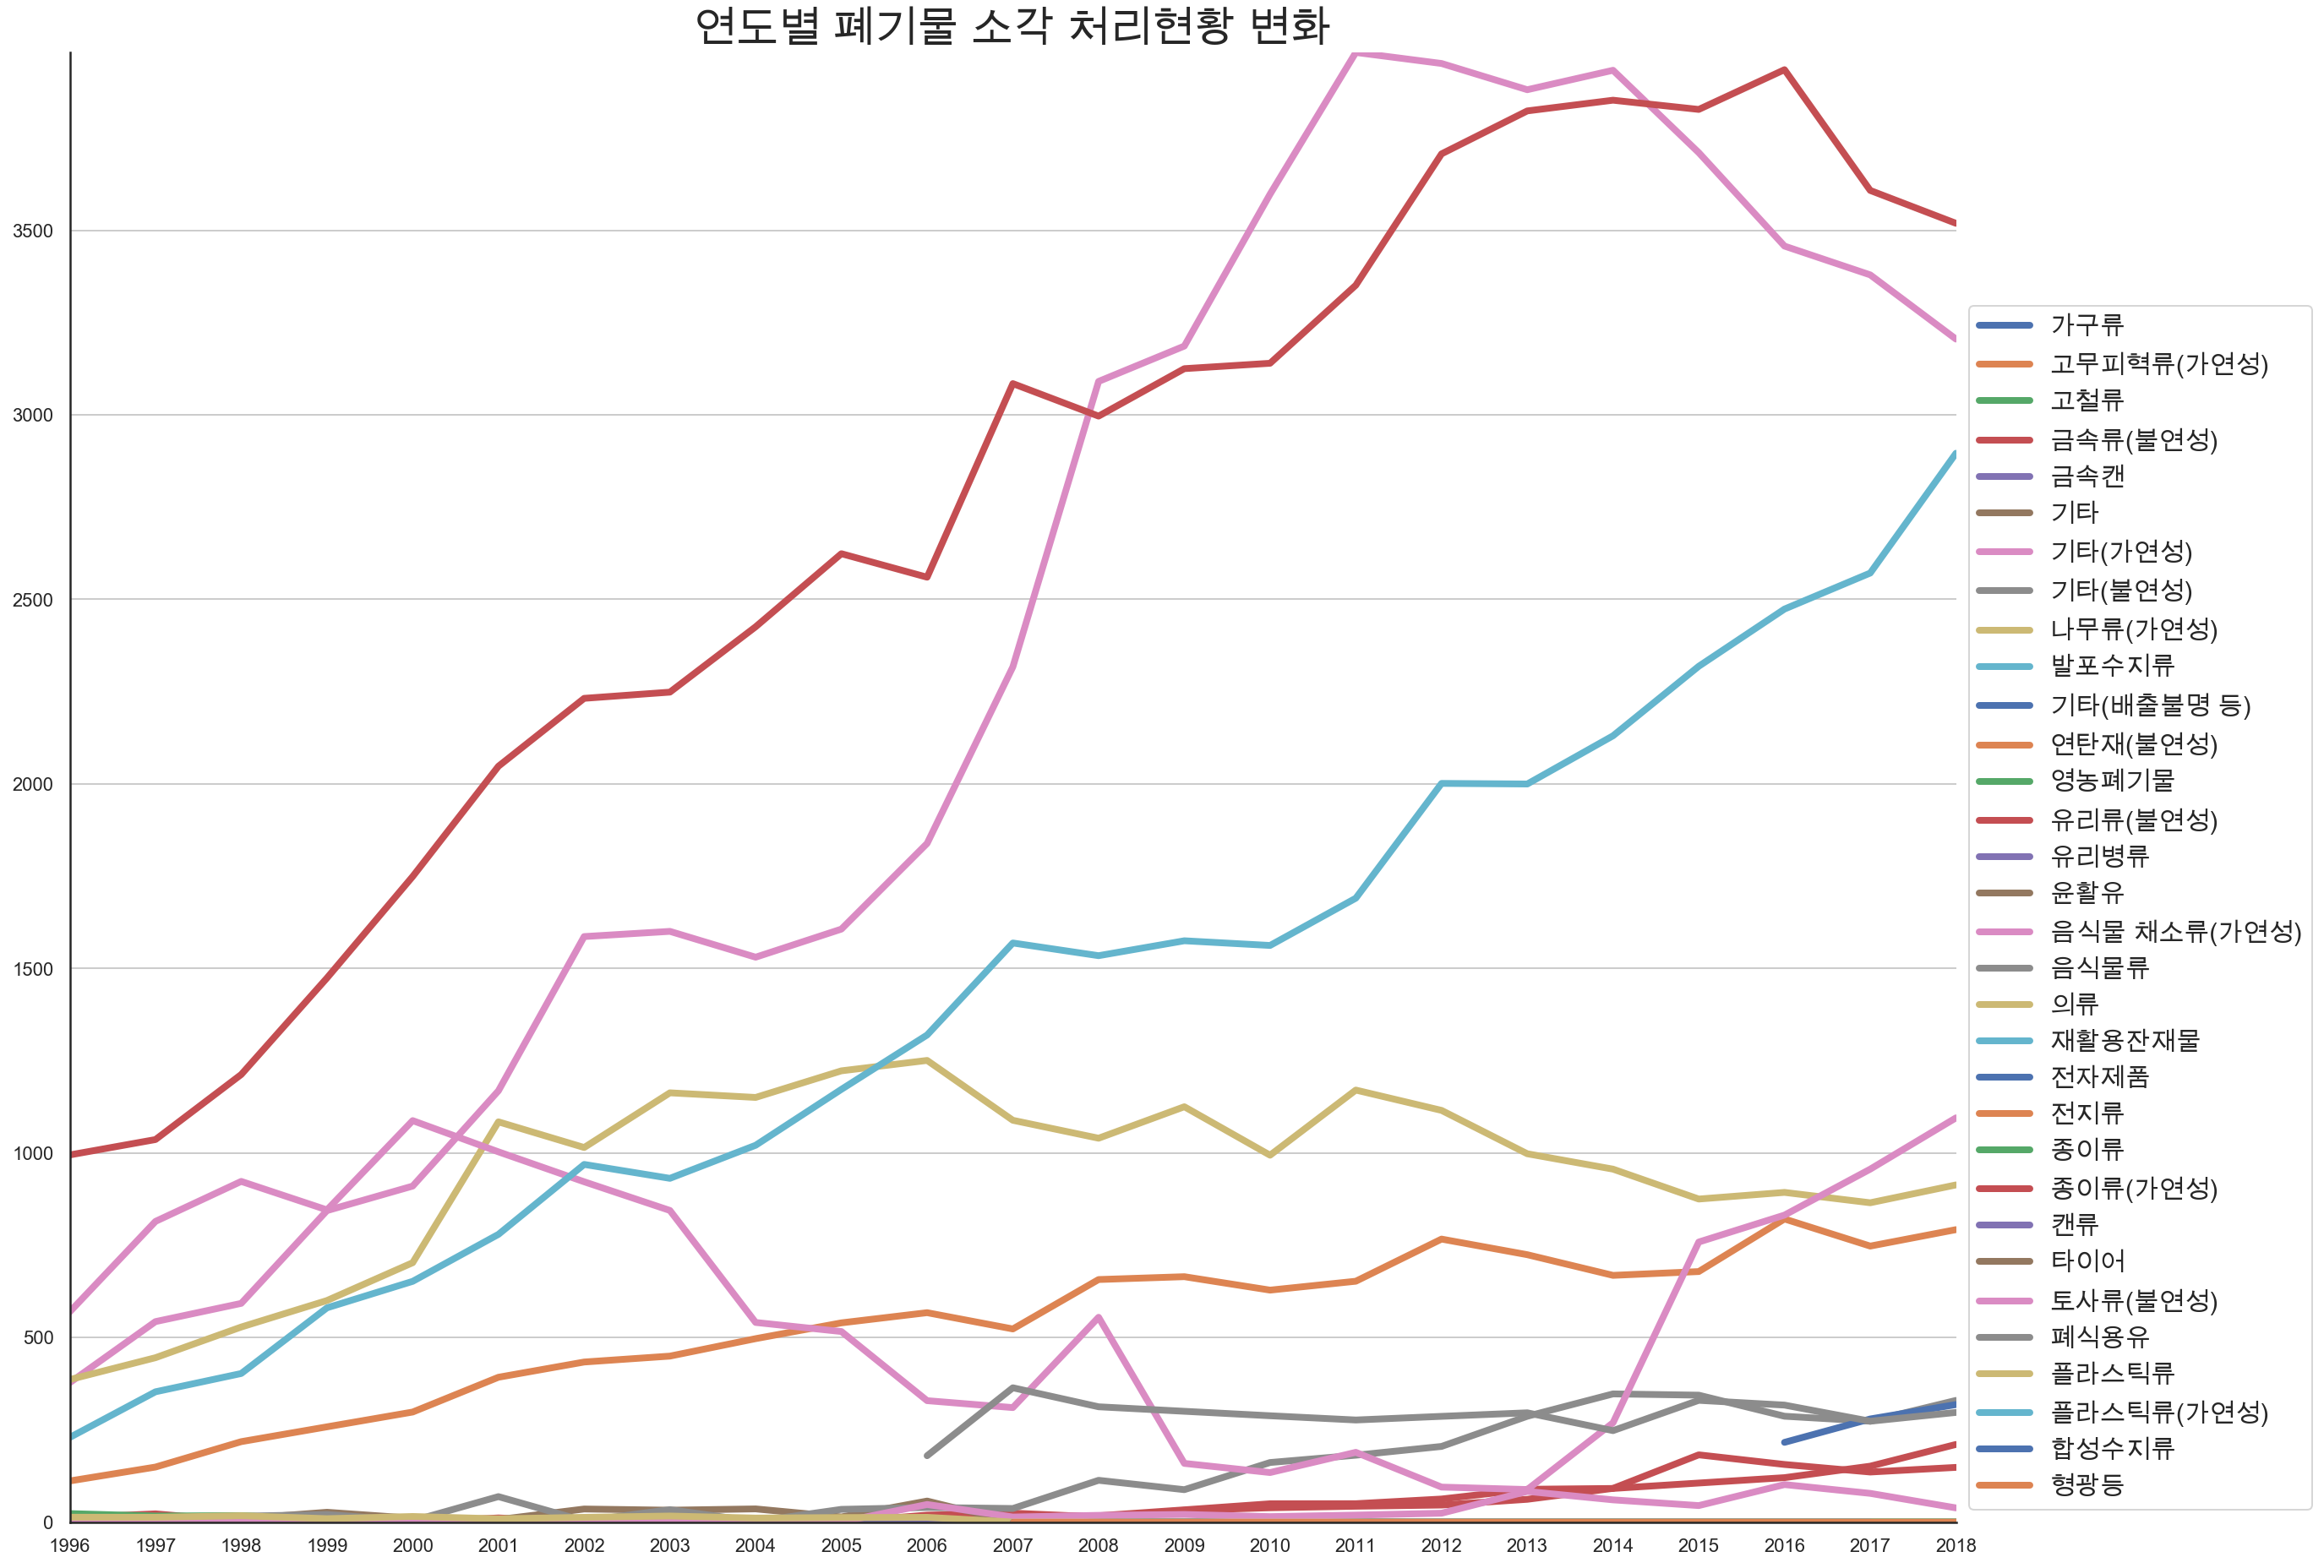

In [55]:
# 분류 전체

fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(incineration_t.index, incineration_t.values, linewidth=4)
plt.legend(incineration_t.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 소각 처리현황 변화', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.show()

- 상위권 분류만 추출

In [56]:
incineration_7 = incineration_t[['음식물 채소류(가연성)', '음식물류', '종이류(가연성)', '종이류', '플라스틱류(가연성)', '플라스틱류', '금속류(불연성)', '나무류(가연성)', '고무피혁류(가연성)', '유리류(불연성)']]
incineration_7.fillna(value=0, inplace=True)
incineration_7.head()

/Users/mieyhgnaj/opt/anaconda3/envs/dss16/lib/python3.7/site-packages/pandas/core/frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


음식물 채소류(가연성)  음식물류  종이류(가연성)   종이류  플라스틱류(가연성)  플라스틱류  금속류(불연성)  \
연도                                                                      
1996         569.5   0.0     994.7  22.9       229.2   13.1      12.0   
1997         814.6   0.0    1036.4  16.3       352.9   12.9      22.2   
1998         923.0   0.0    1212.6  17.5       402.5   17.1       2.5   
1999         845.8   0.0    1474.1   5.2       580.4    9.1       8.6   
2000        1087.7   0.0    1749.2   9.7       652.2   15.1       0.5   

      나무류(가연성)  고무피혁류(가연성)  유리류(불연성)  
연도                                    
1996     386.0       111.3       0.0  
1997     445.3       149.0       0.0  
1998     528.4       217.8       0.0  
1999     600.2       258.0       0.0  
2000     702.7       298.1       0.0

- 연도마다 분류가 조금씩 다름
- 비슷한 분류끼리 합쳐서 현황 파악

In [57]:
# 종이류 + 종이류(가연성), 금속캔 + 캔류, 음식물 채소류(가연성) + 음식물류, 플라스틱류(가연성) + 플라스틱류
# 컬럼명 보기 쉽게 수정
incineration7 = incineration_7.copy()

In [58]:
# 종이류 + 종이류(가연성), 금속캔 + 캔류, 음식물 채소류(가연성) + 음식물류, 플라스틱류(가연성) + 플라스틱류

incineration7['종이류'] = incineration7['종이류']+incineration7['종이류(가연성)']
incineration7['음식물류'] = incineration7['음식물류']+incineration7['음식물 채소류(가연성)']
incineration7['플라스틱류'] = incineration7['플라스틱류']+incineration7['플라스틱류(가연성)']
incineration7.drop(['종이류(가연성)', '음식물 채소류(가연성)',
               '플라스틱류(가연성)'], axis=1, inplace=True)
incineration7.head()

음식물류     종이류  플라스틱류  금속류(불연성)  나무류(가연성)  고무피혁류(가연성)  유리류(불연성)
연도                                                                   
1996   569.5  1017.6  242.3      12.0     386.0       111.3       0.0
1997   814.6  1052.7  365.8      22.2     445.3       149.0       0.0
1998   923.0  1230.1  419.6       2.5     528.4       217.8       0.0
1999   845.8  1479.3  589.5       8.6     600.2       258.0       0.0
2000  1087.7  1758.9  667.3       0.5     702.7       298.1       0.0

In [59]:
# 컬럼명 보기 쉽게 수정
incineration7.columns = ['음식물류', '종이류', '플라스틱류', '금속류', '나무류', '고무피혁류', '유리류']
incineration7.head()

음식물류     종이류  플라스틱류   금속류    나무류  고무피혁류  유리류
연도                                                  
1996   569.5  1017.6  242.3  12.0  386.0  111.3  0.0
1997   814.6  1052.7  365.8  22.2  445.3  149.0  0.0
1998   923.0  1230.1  419.6   2.5  528.4  217.8  0.0
1999   845.8  1479.3  589.5   8.6  600.2  258.0  0.0
2000  1087.7  1758.9  667.3   0.5  702.7  298.1  0.0

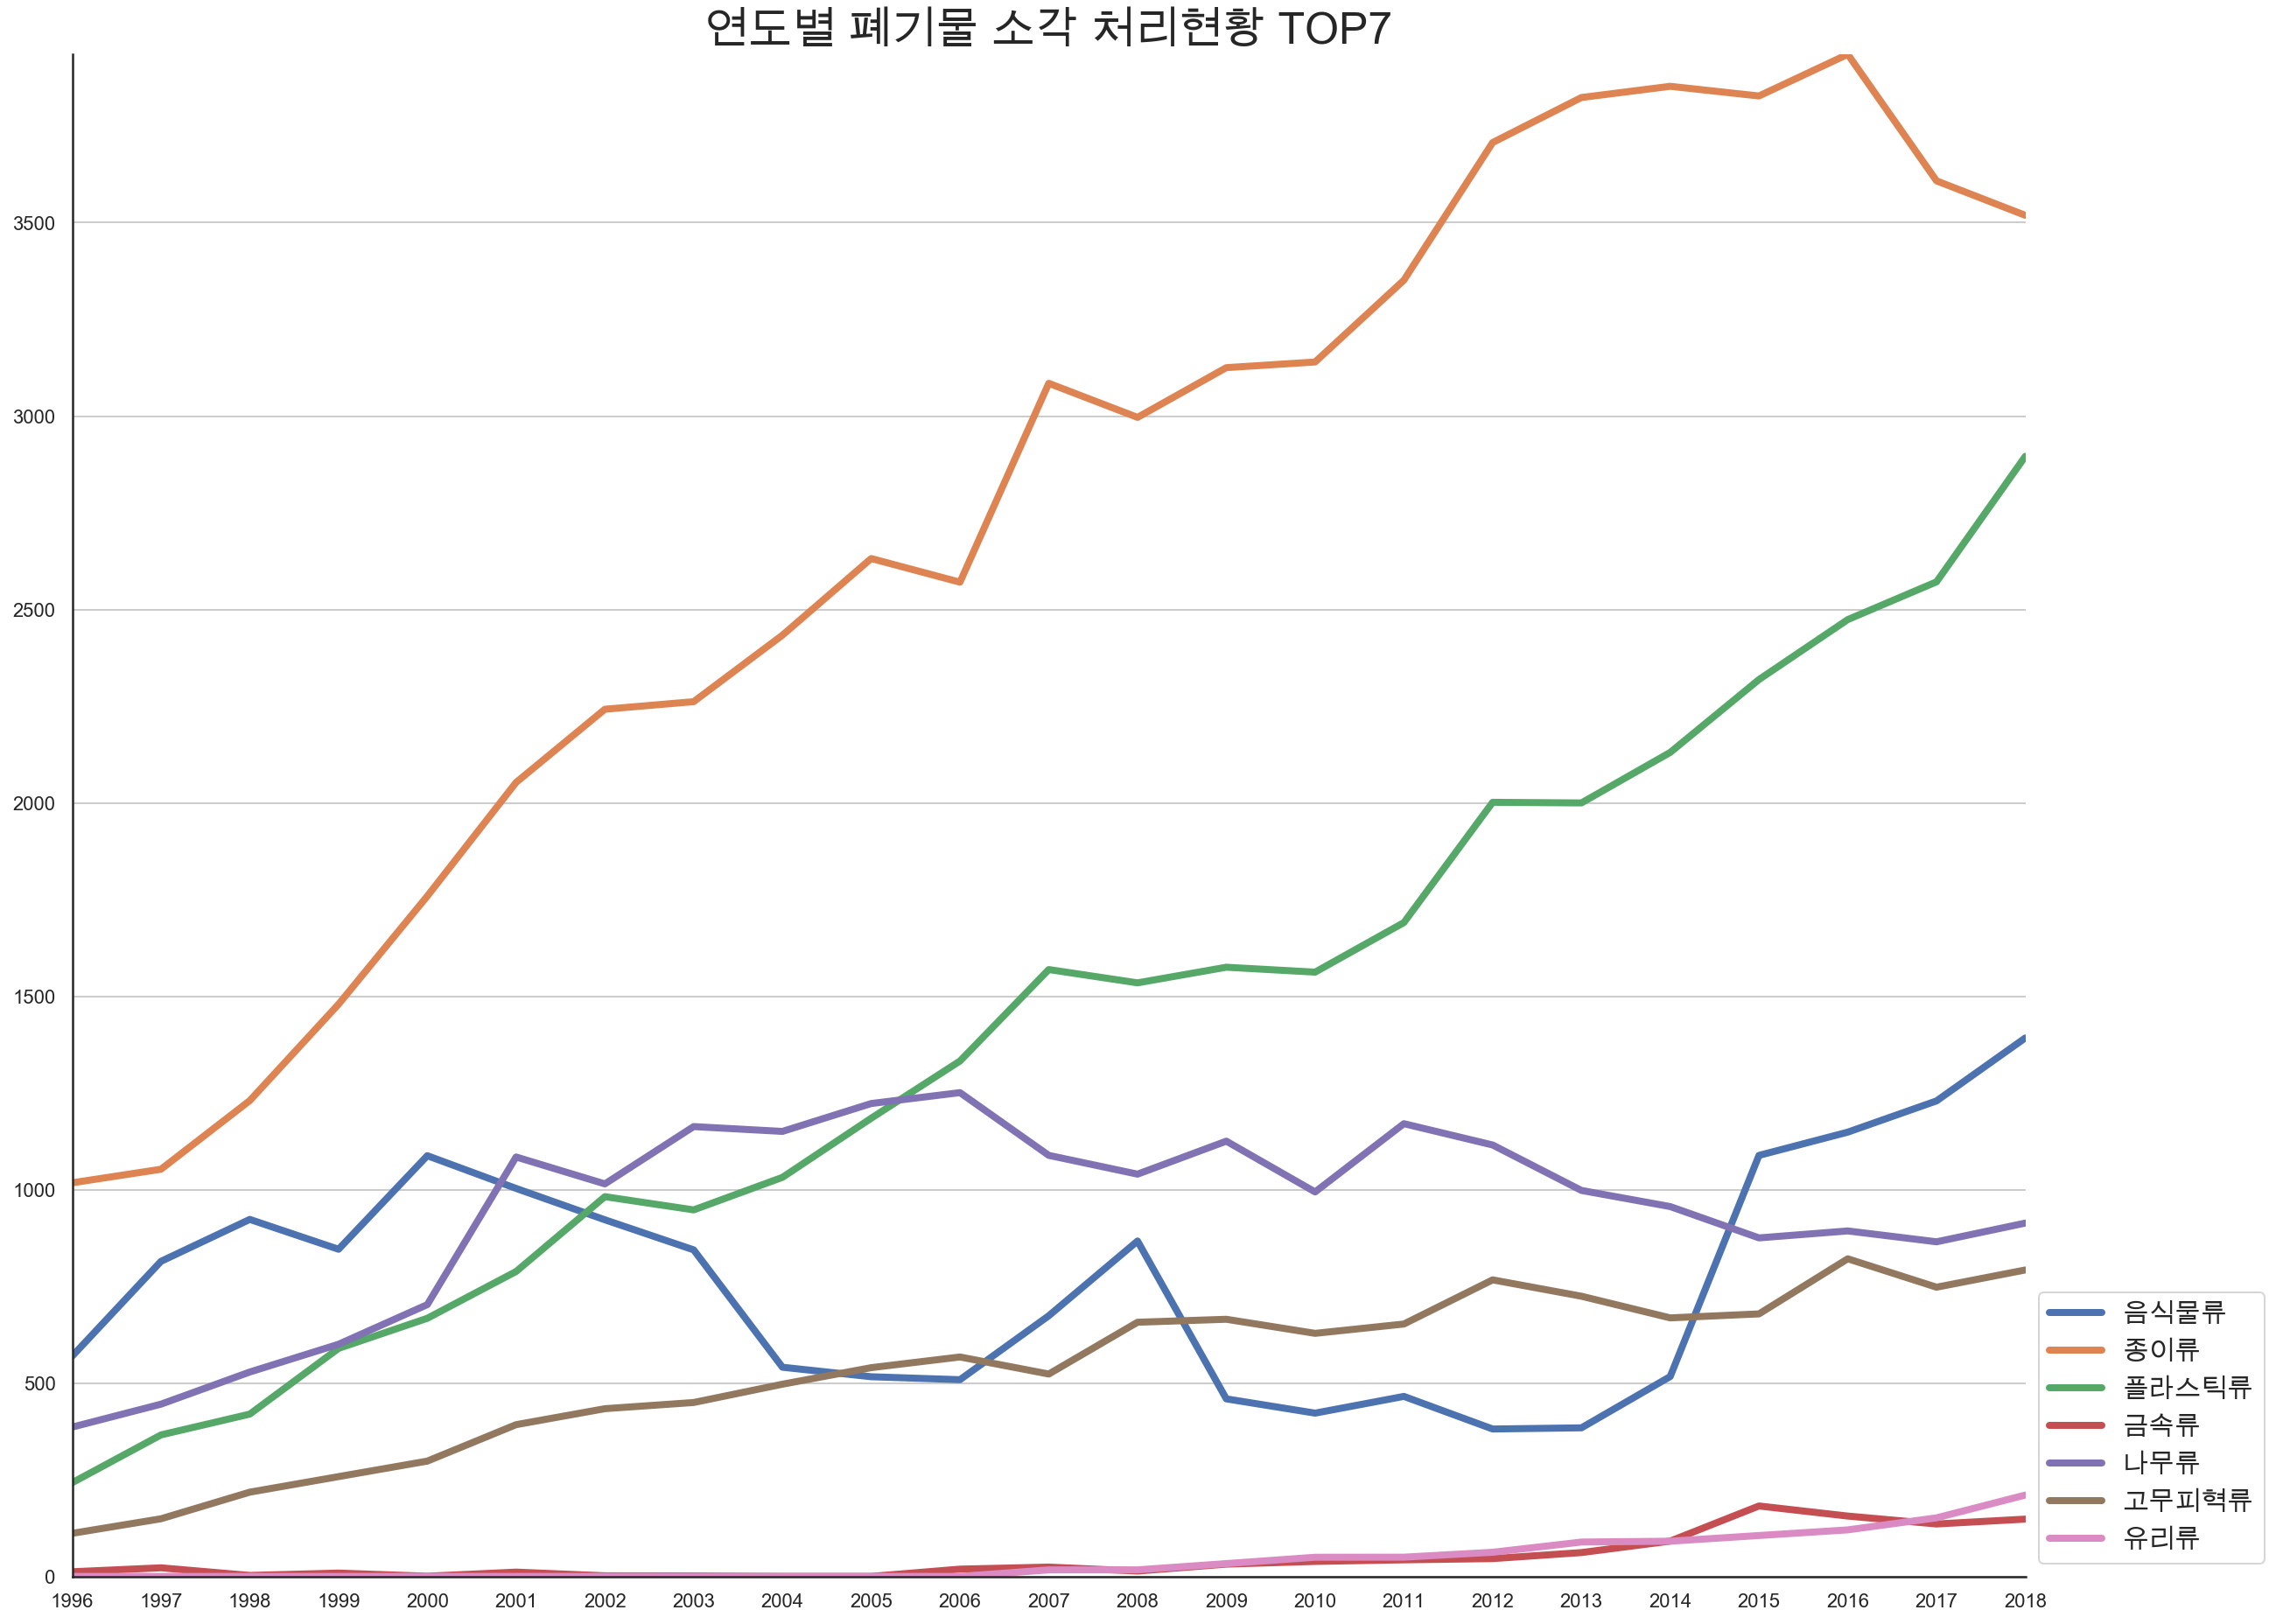

In [60]:
fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(incineration7.index, incineration7.values, linewidth=4)
plt.legend(incineration7.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 소각 처리현황 TOP7', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.savefig('./image/incineration7.png', dpi=150, bbox_inches='tight')
plt.show()